# PREDICTING PRICES OF HOUSES IN NIGERIA

**DATA SOURCE**
- House prices: https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset

In [1]:
# import matplotlib.pyplot as plt
import matplotlib as mpl

import optuna
import warnings

from glob import glob #library that helps us search for files

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from category_encoders import OneHotEncoder,TargetEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
import xgboost as xgb
from sklearn.feature_selection import RFE


warnings.simplefilter(action="ignore")
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import VarianceThreshold
#pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
#importing dataset

data=pd.read_csv("/Users/USER/Documents/DATASETS/nigeria_houses_data.csv")

In [3]:
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13888 entries, 0 to 24324
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       13888 non-null  float64
 1   bathrooms      13888 non-null  float64
 2   toilets        13888 non-null  float64
 3   parking_space  13888 non-null  float64
 4   title          13888 non-null  object 
 5   town           13888 non-null  object 
 6   state          13888 non-null  object 
 7   price          13888 non-null  float64
dtypes: float64(5), object(3)
memory usage: 976.5+ KB


In [6]:
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,13888.000000,13888.000000,13888.000000,13888.000000,1.388800e+04
mean,4.185412,4.516993,4.997264,4.072725,4.002137e+08
std,1.317457,1.360651,1.424560,1.638640,1.614926e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,3.000000,4.000000,4.000000,3.000000,3.800000e+07
50%,4.000000,5.000000,5.000000,4.000000,7.500000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [7]:
#the minimum house price is 90000, checking where it's located
data.min()

bedrooms                    1.0
bathrooms                   1.0
toilets                     1.0
parking_space               1.0
title            Block of Flats
town                        Aba
state                      Abia
price                   90000.0
dtype: object

In [8]:
data.max()

bedrooms                       9.0
bathrooms                      9.0
toilets                        9.0
parking_space                  9.0
title            Terraced Duplexes
town                    Yewa South
state                       Rivers
price              1800000000000.0
dtype: object

In [9]:
data.isnull().sum()
#checking for null values

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [10]:
#checking for whitespaces in columns
[i for i in data.columns if i.startswith(' ') or i.endswith(' ')]

[]

In [11]:
#checking for white spaces in data
np.where([data.apply(lambda x:x==' ')])

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [12]:
#removing values below 400k and above 10billion naira
data_mask = data[(data['price']>=400000) & (data['price']<=10000000000)]

In [13]:
# SPLITTING DATA

train,test,=train_test_split(data_mask,test_size=0.21,random_state=12)

In [14]:
train.shape,test.shape

((10955, 8), (2913, 8))

## EXPLORATORY DATA ANALYSIS 

**Categorical variables**

In [15]:
df=train.copy()

In [16]:
cat = df.select_dtypes('O')

In [17]:
for i in cat.columns:
    print(i,df[i].nunique())

title 7
town 179
state 25


Town and state have high cardinalities and will affect model performance if encoded. A solution to this is to replace the towns and state with their current population, remove values with low frequency, or target encoding.

**#univariate analysis of categorical variables**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

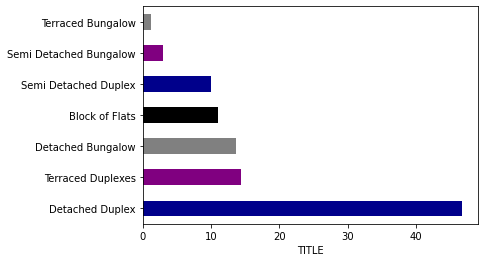

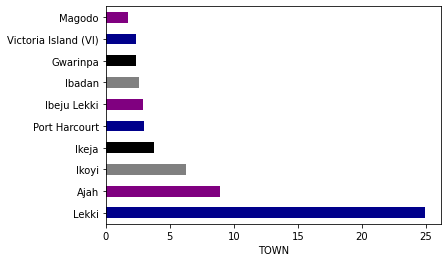

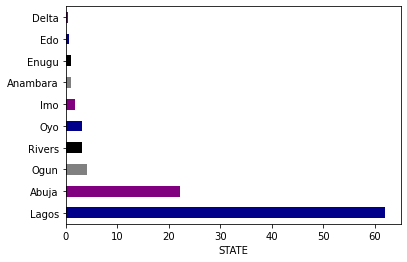

In [18]:
for i in cat:
    plt.figure()
    ax=((df[i].value_counts()*100/len(df)).head(10)).plot(kind='barh',color=['darkblue','purple','grey','k'])
    ax.set_xlabel(i.upper())

**Relationship between categorical variables and the target variable**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

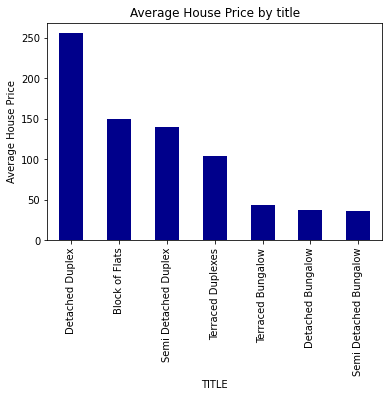

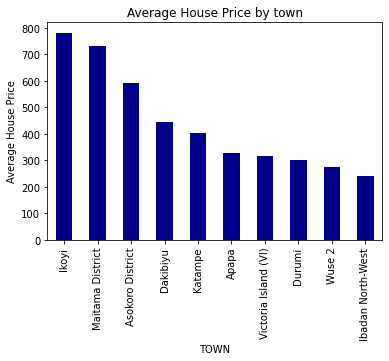

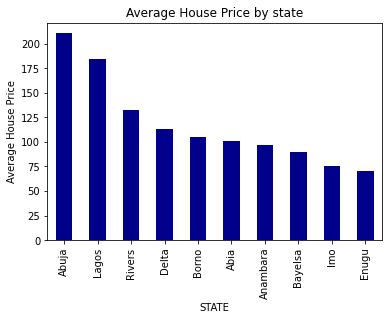

In [19]:
for i in cat.columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).head(10).plot.bar(color='darkblue')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

In [20]:
print('Minimum House Price:',df['price'].min())
print('Maximum House Price:',df['price'].max())

Minimum House Price: 462837.0
Maximum House Price: 9000000000.0


**Numerical variables**

In [21]:
num=df.select_dtypes('number')
num[:3]

,bedrooms,bathrooms,toilets,parking_space,price
11228,5.0,5.0,6.0,4.0,128000000.0
3287,5.0,6.0,7.0,4.0,165000000.0
13924,1.0,1.0,1.0,4.0,40000000.0


**#relationship between discrete features and the target variable**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

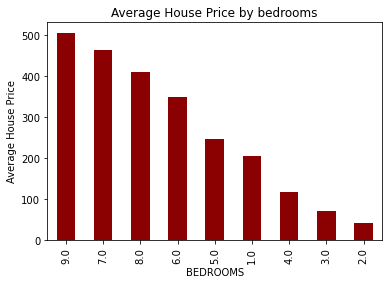

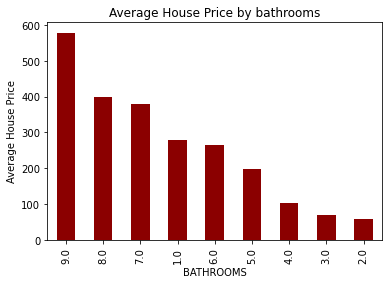

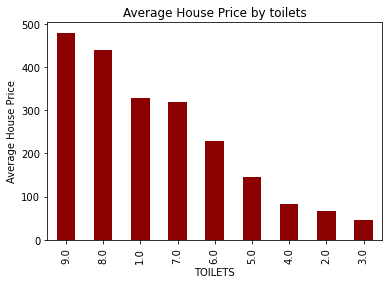

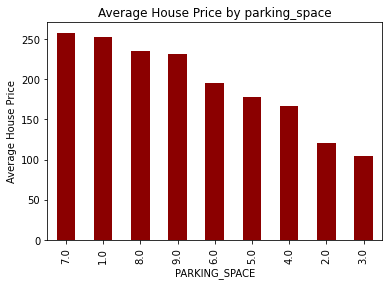

In [22]:
for i in num.iloc[:,:4].columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).plot.bar(color='darkred')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

**Distribution of target variable**

<AxesSubplot:xlabel='price', ylabel='Density'>

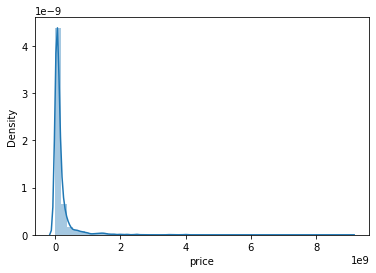

In [23]:
sns.distplot(df['price'])


The target variable is very skewed and has a lot of outliers. Lets try a log transformation of the target variable.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='price', ylabel='Density'>

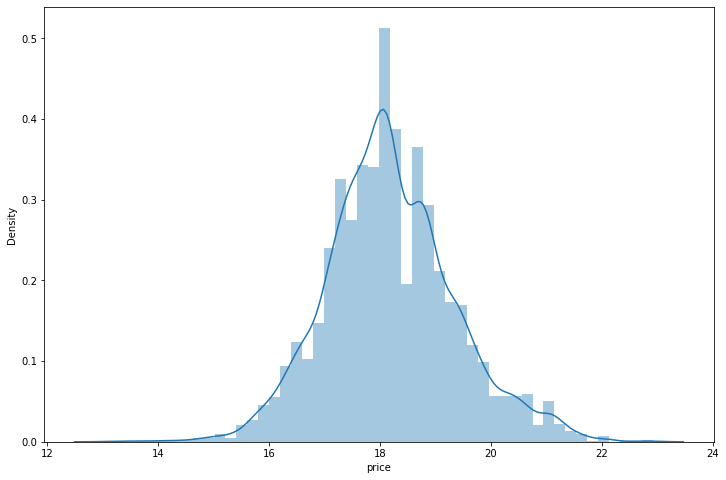

In [24]:
#distribution of continuous variable
plt.figure(figsize=(12,8))

sns.distplot(np.log(df['price']))


In [25]:
df['log_price']=np.log(df['price'])# log transformation of target variable

<AxesSubplot:>

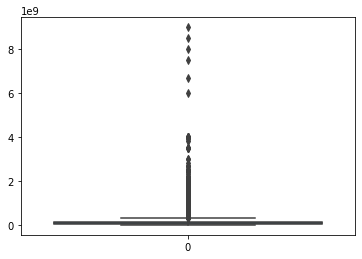

In [26]:
sns.boxplot(df['price'])


<AxesSubplot:>

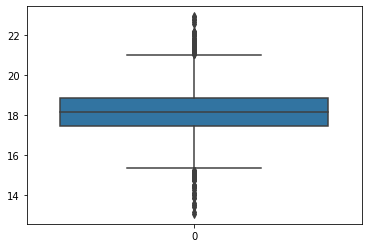

In [27]:
sns.boxplot(df['log_price'])


In [28]:
print('Price')
print('Skewness',df['price'].skew())
print('Kurtosis',df['price'].kurt())
Mean=round(df['price'].mean(),2)
Median=round(df['price'].median(),2)
print('Mean',Mean)
print('Median',Median)
if Mean>Median:
    print('Right Skewed')
else:
    print('Left Skewed')
    print('*****************************************************************************')
    print()

Price
Skewness 8.773624640425039
Kurtosis 136.19027776855026
Mean 171723809.41
Median 75000000.0
Right Skewed


The distplot and boxplot show the presence of outliers in the data. Are they due to errors or typos in the data collection process, or do they represent legitimate observations with unusually high or low values?



**Checking for linearity**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

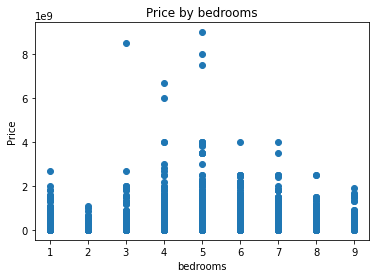

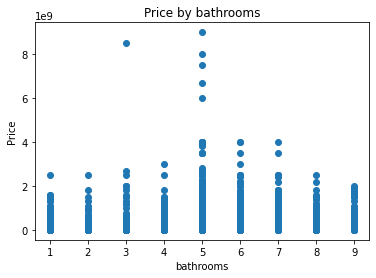

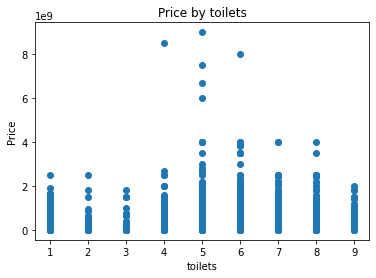

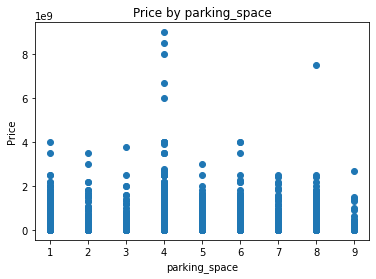

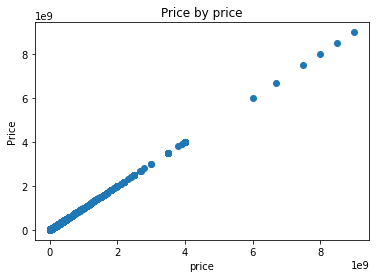

In [29]:
for i in num.columns:
    plt.figure()
    plt.scatter(df[i],df['price'])
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.title(f'Price by {i}')

**Checking for correlation and multicollinearity**

<AxesSubplot:>

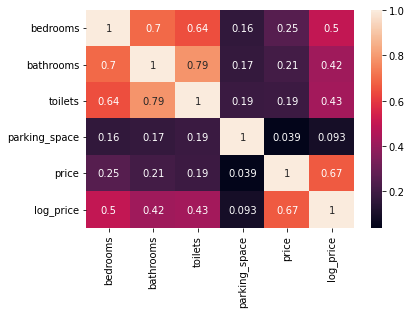

In [30]:
sns.heatmap(df.corr(),annot=True)

**Checking for normality**

In [31]:
from scipy.stats import shapiro

In [32]:
for i in num:
    print('VARIABLE:',i.upper())
    pvalue=stats.shapiro(df[i])[1]
    if pvalue<0.05:
        print('Null hypothesis rejected. Data is not normal')
    else:
        print('Null hypothesis accepted. Data is normal')
    print()

VARIABLE: BEDROOMS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

VARIABLE: BATHROOMS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

VARIABLE: TOILETS


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

VARIABLE: PARKING_SPACE


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

VARIABLE: PRICE


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal



## FEATURE ENGINEERING

**Should Outliers be removed?**

In [33]:
mini,maxi=df['price'].quantile([0.01,0.99])

mask = df['price'].between(mini,maxi)

df=df[mask]

<AxesSubplot:>

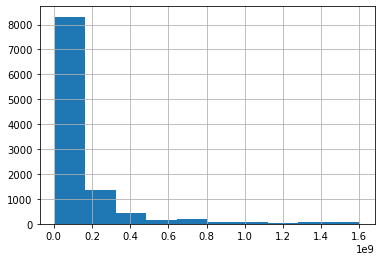

In [34]:
df.price.hist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

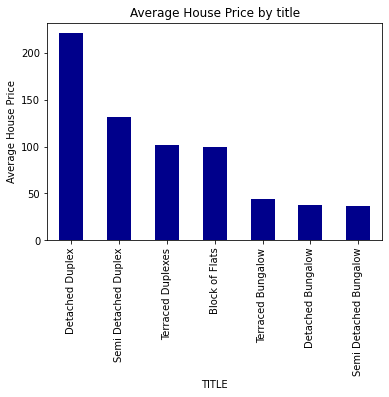

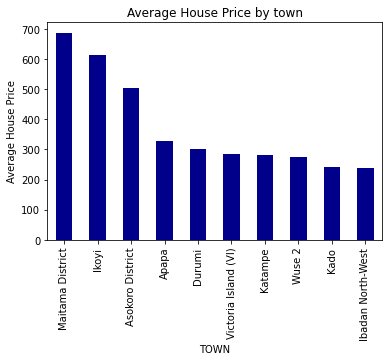

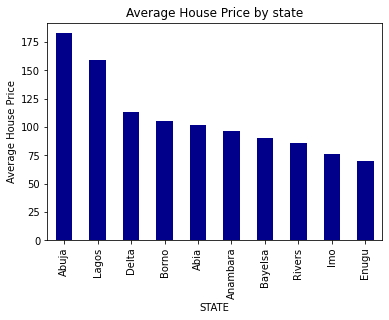

In [35]:
for i in cat.columns:
    plt.figure()
    (df.groupby(i)['price'].mean()/1e6).sort_values(ascending=False).head(10).plot.bar(color='darkblue')
    plt.xlabel(i.upper())
    plt.ylabel('Average House Price')
    plt.title(f'Average House Price by {i}');

**Should with high cardinality be treated by replacing values that are less than 1% with others?**

In [36]:
for m in cat:
    
    temp=df.groupby(m)['price'].count()/len(df)
    
    #features greater than 1%
    temp_df=temp[temp>0.01].index 
    
    #extract the feature if it is in temp_df(>1%) else replace with rare_var
    df[m]=np.where(df[m].isin(temp_df),df[m],'Others')
    

In [37]:
for a in df.select_dtypes('O').columns:
    print(a,df[a].nunique())

title 7
town 22
state 8


In [38]:
df['Total_rooms']= df['bedrooms'] + df['bathrooms'] + df['toilets']#creating a new column

**Should high cardinality variables like town and state be replaced with their populations instead?**

In [39]:
#importing dataset

town1=pd.read_csv("/Users/USER/Documents/DATASETS/Town_populations_nigeria.csv")
town1.rename(columns={'city':'town'},inplace=True)
town1=town1[['town','population']]

town2=pd.read_csv("/Users/USER/Documents/DATASETS/Town_populations_nigeria_2.csv")
town2.rename(columns={'city':'town','2022':'population'},inplace=True)
town2=town2[['town','population']]

town=pd.concat([town1,town2],axis=0)
town2.shape

map_town=dict(zip(town['town'],town['population']))

data_copy=data.copy()

data_copy['town']=data_copy['town'].map(map_town)

print('Towns with no population value:',data_copy['town'].map(map_town).isnull().sum())
data_copy.head()

Towns with no population value: 13888


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,NaN,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,NaN,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,401272.0,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,NaN,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,401272.0,Lagos,75000000.0


# BASELINE MODEL 

In [40]:
train_copy=train.copy()
test_copy=test.copy()



ytrain=train_copy['price']
xtrain=train.drop(['price'],axis=1)

In [41]:
y_mean_1=ytrain.mean()

y_base=[y_mean_1]*len(ytrain)

base_mae=mean_absolute_error(y_base,ytrain)
print("Mean apt price:", y_mean_1)

print("Baseline MAE:", base_mae)

Mean apt price: 171723809.40648106
Baseline MAE: 165398562.90897936


In [42]:
#stratified kfold validation scheme:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 752)

<IPython.core.display.Javascript object>

# EXPERIMENT 1
**FEATURE ENGINEERING:**
  - Power transformation of target variable: Box-cox transformation
  - Reducing high cardinality by replacing values less than 10 with 'others'
  - Adding a new column
  - Encoding columns with OneHotEncoder
  - Optuna hyperparameter tuning

**Power Transformer**

There are two popular approaches for such automatic power transforms; they are:

- Box-Cox Transform
- Yeo-Johnson Transform
The transformed training dataset can then be fed to a machine learning model to learn a predictive modeling task.

A hyperparameter, often referred to as lambda  is used to control the nature of the transform.

… statistical methods can be used to empirically identify an appropriate transformation. Box and Cox (1964) propose a family of transformations that are indexed by a parameter, denoted as lambda

Below are some common values for lambda:

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

Source: https://machinelearningmastery.com/power-transforms-with-scikit-learn/


In [43]:
power = PowerTransformer(method='box-cox') 

power.fit(ytrain.to_frame())

ytrain_1=power.transform(ytrain.to_frame())
xtrain_1=train_copy.drop(['price'],axis=1)




ytest=test_copy['price']
y_test_1 = power.transform(ytest.to_frame())
xtest_1 = test_copy.drop(['price'],axis=1)

In [44]:
ytrain[:4]

11228    128000000.0
3287     165000000.0
13924     40000000.0
23750    140000000.0
Name: price, dtype: float64

In [45]:
ytrain_1[:4]

array([[ 0.43936825],
       [ 0.65020542],
       [-0.56873841],
       [ 0.51414557]])

<AxesSubplot:ylabel='Density'>

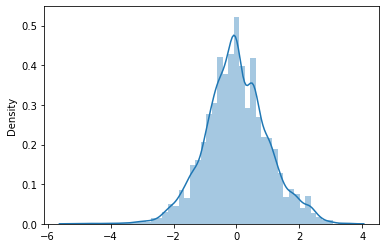

In [46]:
sns.distplot(ytrain_1)

# MODEL BUILDING 1

In [47]:
def regression_model_1(model):
    
    model.fit(xtrain_1,ytrain_1)
    
    train_pred=model.predict(xtrain_1)
        
    # The .reshape(-1,1) method changes a numpy array into a numpy matrix with 1 column
    ridge_pred_reversed = power.inverse_transform(train_pred.reshape(-1,1))
    
    ytrain_reversed =  power.inverse_transform(ytrain_1.reshape(-1,1))
    
    r2score=r2_score(ytrain_reversed,ridge_pred_reversed)
    
    mae=mean_absolute_error(ytrain_reversed,ridge_pred_reversed)
    
    mse=mean_squared_error(ytrain_reversed,ridge_pred_reversed)
    
    root_mean_squared_error=np.sqrt(mse)
    
    #to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
    # A RMSE value lower than the standard deviation indicates good model performance
    
    std=np.std(ytrain_1)
    
    normalised_rmse=root_mean_squared_error/(ytrain_reversed.max()- ytrain_reversed.min())
    
    
    n=xtrain_1.shape[0]
    p=xtrain_1.shape[1]
    adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)
    
    
    
    
   
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Standard deviation of dependent variable','---',std)

    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    
    sns.regplot(x=ridge_pred_reversed,y=ytrain_reversed-ridge_pred_reversed,color='darkblue',line_kws={'color':'red'})
    #sns.regplot()
    plt.title('Residual Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    stats=pd.DataFrame(ytrain_reversed)
    
    stats['Predicted']=ridge_pred_reversed
    
    stats.rename(columns={0:'Actual'},inplace=True)

    stats['Residuals']=stats['Actual'] - stats['Predicted']

    stats['Diff_in_%']=abs((stats['Residuals']/stats['Actual'])*100)
    
    metrics_table_1 = pd.DataFrame({'Mean_absolute_error':mae,
                                   'Mean_squared_error':mse,
                                   'Root_mean_squared_error':root_mean_squared_error,
                                   'R2_score':r2score},index=[model])



    #to view all data
    pd.options.display.max_rows=1000
    stats = stats.sort_values(by='Diff_in_%')
    print(stats)
    return model,metrics_table_1
    
    
def regression_weights_1(model):
    model.fit(xtrain_1,ytrain_1)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept


# PIPELINE 1

In [48]:
'''from sklearn.base import BaseEstimator, TransformerMixin

# Add a log transformation step to the pipeline
#class LogTransformer(BaseEstimator, TransformerMixin):
 #   def fit(self, X, y):
  #      return self
   # def transform(self, X, y=None):
    #    return np.log1p(X)
    

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy

# Add a step to replace high cardinality variables with 'others' in the pipeline
class ReplaceHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10):
        self.threshold = threshold
        
    def fit(self, X, y):
        return self
    
    #def transform(self, X, y=None):
     #   columns = np.array(X.select_dtypes(include="object").columns)
        
      #  u = np.array([X[x].nunique() for x in columns]) >= self.threshold
        
       # high_cardinal_col = columns[u]
        
        #X = X.copy().drop(columns=high_cardinal_col)
        # value_counts = xtrain[column].value_counts()
        # to_replace = value_counts[value_counts <= threshold].index
        # xtrain[column].replace(to_replace, 'others', inplace=True)
        #return X
    def transform(self,X,y=None):
        X_copy = X.copy()

        # Add a step to replace high cardinality variables with 'others' in the pipeline
        for i in X_copy.select_dtypes('O').columns:
            value_counts = X_copy[i].value_counts()
            to_replace = value_counts[value_counts <= self.threshold].index
            X_copy[i].replace(to_replace, 'others', inplace=True)
            return X_copy'''
        
        

'from sklearn.base import BaseEstimator, TransformerMixin\n\n# Add a log transformation step to the pipeline\n#class LogTransformer(BaseEstimator, TransformerMixin):\n #   def fit(self, X, y):\n  #      return self\n   # def transform(self, X, y=None):\n    #    return np.log1p(X)\n    \n\n# Add a step to create new columns in the pipeline\nclass FeatureUp(BaseEstimator, TransformerMixin):\n    def fit(self, X, y):\n        return self\n    def transform(self, X, y=None):\n        X_copy = X.copy()\n        X_copy[\'total_rooms\'] = X_copy[\'bedrooms\'] + X_copy[\'bathrooms\'] + X_copy[\'toilets\']\n        return X_copy\n\n# Add a step to replace high cardinality variables with \'others\' in the pipeline\nclass ReplaceHighCardinality(BaseEstimator, TransformerMixin):\n    def __init__(self, threshold=10):\n        self.threshold = threshold\n        \n    def fit(self, X, y):\n        return self\n    \n    #def transform(self, X, y=None):\n     #   columns = np.array(X.select_dtypes(

# FEATURE ENGINEERING

In [49]:
#adding a new column
xtrain_1['total_rooms'] = xtrain_1['bedrooms'] + xtrain_1['bathrooms'] + xtrain_1['toilets']


## Adding a step to replace high cardinality variables with 'others' in the pipeline

for i in xtrain_1.select_dtypes('O').columns:
    value_counts = xtrain_1[i].value_counts()
    to_replace = value_counts[value_counts <= 30].index
    xtrain_1[i].replace(to_replace, 'Others', inplace=True)



In [50]:
xtrain_1.town.nunique()

56

In [51]:
xtrain_1=pd.get_dummies(xtrain_1)

# RIDGE REGRESSION

[I 2023-01-03 15:33:22,313] A new study created in memory with name: no-name-b9a3f6a5-b115-4e89-a043-2e41932736c4
[I 2023-01-03 15:33:22,678] Trial 0 finished with value: -0.35587790647919004 and parameters: {'alpha': 7.990082024455664e-20}. Best is trial 0 with value: -0.35587790647919004.
[I 2023-01-03 15:33:23,030] Trial 1 finished with value: -0.3558777175628941 and parameters: {'alpha': 4.468514174934643e-22}. Best is trial 0 with value: -0.35587790647919004.
[I 2023-01-03 15:33:23,412] Trial 2 finished with value: -0.35587790517818074 and parameters: {'alpha': 3.5205178466284734e-20}. Best is trial 0 with value: -0.35587790647919004.
[I 2023-01-03 15:33:23,520] Trial 3 finished with value: -0.3556742340892282 and parameters: {'alpha': 4.996242053431753}. Best is trial 0 with value: -0.35587790647919004.
[I 2023-01-03 15:33:23,888] Trial 4 finished with value: -0.35587790756043197 and parameters: {'alpha': 1.0057791434994859e-13}. Best is trial 4 with value: -0.35587790756043197.


Train_Mean_absolute_error --- 86914220.59165066
Train_R2_score --- 0.29851462886658753
Train_Mean_squared_error --- 9.006819942959254e+16
Train_Root_mean_squared_error --- 300113644.190984
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.29341878111306663
Train_Normalised_rmse --- 0.03334767541433661




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

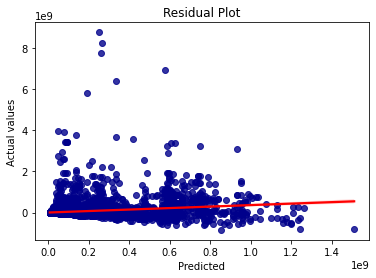

            Actual     Predicted     Residuals     Diff_in_%
1713   120000000.0  1.199855e+08  1.450097e+04      0.012084
8857   100000000.0  9.998707e+07  1.292824e+04      0.012928
10213   30000000.0  3.000584e+07 -5.843833e+03      0.019479
6989    85000000.0  8.498023e+07  1.977352e+04      0.023263
5814    15000000.0  1.500549e+07 -5.487762e+03      0.036585
...            ...           ...           ...           ...
1025     1200000.0  3.323878e+08 -3.311878e+08  27598.979312
8936      462837.0  1.883292e+08 -1.878663e+08  40590.173866
4598     1000000.0  4.126044e+08 -4.116044e+08  41160.440378
7        1200000.0  5.618018e+08 -5.606018e+08  46716.815612
1094      660000.0  3.389245e+08 -3.382645e+08  51252.196065

[10955 rows x 4 columns]


In [52]:

ridge=Ridge()

# Carrying Hyper Parameter Optuna Optimization
'''Create Objective Function: Functions that are to be optimized are named Objective. Our goal is to find the value of x 
that minimizes the output of the objective function. This is the “optimization.” During the optimization, Optuna repeatedly 
calls and evaluates the objective function with different values of x.'''

def objective(trial):
    params ={
    'alpha': trial.suggest_loguniform('alpha', 1e-30,50),
     }
    ridge.set_params(**params)

    
    
    return np.mean(cross_val_score(ridge, xtrain_1,ytrain_1, cv=5, scoring='neg_mean_squared_error'))

study = optuna.create_study()
study.optimize(objective, n_trials=15)

ridge_regressor_1 = ridge.set_params(**study.best_params)

        
# Fit the model
model,metrics_table_1=regression_model_1(ridge_regressor_1)

In [53]:
metrics_table_1.index=['ridge_experiment_1']
metrics_table_1

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
ridge_experiment_1,8.691422e+07,9.006820e+16,3.001136e+08,0.298515


# LASSO REGRESSION

[I 2023-01-03 15:33:27,350] A new study created in memory with name: no-name-ff3ceda9-1d6d-4e29-b6d7-db7d36eb7739
[I 2023-01-03 15:33:27,477] Trial 0 finished with value: -1.000185985874863 and parameters: {'alpha': 40.98928803248923}. Best is trial 0 with value: -1.000185985874863.
[I 2023-01-03 15:33:27,595] Trial 1 finished with value: -1.000185985874863 and parameters: {'alpha': 15.471742316591042}. Best is trial 0 with value: -1.000185985874863.
[I 2023-01-03 15:33:27,711] Trial 2 finished with value: -1.000185985874863 and parameters: {'alpha': 17.642953526909462}. Best is trial 0 with value: -1.000185985874863.
[I 2023-01-03 15:33:27,822] Trial 3 finished with value: -1.000185985874863 and parameters: {'alpha': 41.25121363907462}. Best is trial 0 with value: -1.000185985874863.
[I 2023-01-03 15:33:27,937] Trial 4 finished with value: -1.000185985874863 and parameters: {'alpha': 19.760397928813944}. Best is trial 0 with value: -1.000185985874863.
[I 2023-01-03 15:33:28,051] Trial

Train_Mean_absolute_error --- 133257452.29638815
Train_R2_score --- -0.07087642552726159
Train_Mean_squared_error --- 1.3749668265069896e+17
Train_Root_mean_squared_error --- 370805451.214918
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- -0.07865566576787342
Train_Normalised_rmse --- 0.041202724595595694




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

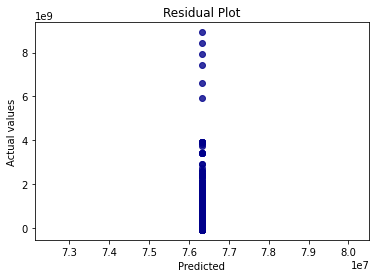

           Actual     Predicted     Residuals     Diff_in_%
5631   76500000.0  7.632843e+07  1.715689e+05      0.224273
9039   76000000.0  7.632843e+07 -3.284311e+05      0.432146
10457  76000000.0  7.632843e+07 -3.284311e+05      0.432146
9044   76000000.0  7.632843e+07 -3.284311e+05      0.432146
4953   76000000.0  7.632843e+07 -3.284311e+05      0.432146
...           ...           ...           ...           ...
2283     710000.0  7.632843e+07 -7.561843e+07  10650.483257
4289     710000.0  7.632843e+07 -7.561843e+07  10650.483257
1094     660000.0  7.632843e+07 -7.566843e+07  11464.913806
1639     500000.0  7.632843e+07 -7.582843e+07  15165.686224
8936     462837.0  7.632843e+07 -7.586559e+07  16391.428110

[10955 rows x 4 columns]


In [54]:
lasso=Lasso()

def objective(trial):
    params ={
    'alpha': trial.suggest_float('alpha', 1e-30,50),
     }
    lasso.set_params(**params)

    
    
    return np.mean(cross_val_score(lasso, xtrain_1,ytrain_1, cv=5, scoring='neg_mean_squared_error'))

study = optuna.create_study()
study.optimize(objective, n_trials=15)

lasso_regressor_1 = lasso.set_params(**study.best_params)

        
# Fit the model
model,metrics_table_1a=regression_model_1(lasso_regressor_1)


In [55]:
metrics_table_1a.index=['lasso_experiment_1']
metrics_table_1a

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
lasso_experiment_1,1.332575e+08,1.374967e+17,3.708055e+08,-0.070876


# ELASTIC NET REGRESSION

[I 2023-01-03 15:33:29,937] A new study created in memory with name: no-name-621e36fa-6c13-4cb5-a6e6-f9defe43264a
[I 2023-01-03 15:33:30,064] Trial 0 finished with value: -0.7697129188165487 and parameters: {'alpha': 10.923079780178725}. Best is trial 0 with value: -0.7697129188165487.
[I 2023-01-03 15:33:30,193] Trial 1 finished with value: -0.7697129188165487 and parameters: {'alpha': 22.19191365265743}. Best is trial 0 with value: -0.7697129188165487.
[I 2023-01-03 15:33:30,310] Trial 2 finished with value: -0.7697129188165487 and parameters: {'alpha': 23.818496416636}. Best is trial 0 with value: -0.7697129188165487.
[I 2023-01-03 15:33:30,423] Trial 3 finished with value: -0.7697129188165487 and parameters: {'alpha': 32.56636026303306}. Best is trial 0 with value: -0.7697129188165487.
[I 2023-01-03 15:33:30,541] Trial 4 finished with value: -0.7697129188165487 and parameters: {'alpha': 16.526180321124777}. Best is trial 0 with value: -0.7697129188165487.
[I 2023-01-03 15:33:30,654

Train_Mean_absolute_error --- 133257452.29638815
Train_R2_score --- -0.07087642552726159
Train_Mean_squared_error --- 1.3749668265069896e+17
Train_Root_mean_squared_error --- 370805451.214918
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- -0.07865566576787342
Train_Normalised_rmse --- 0.041202724595595694




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

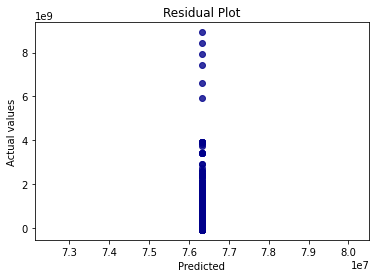

           Actual     Predicted     Residuals     Diff_in_%
5631   76500000.0  7.632843e+07  1.715689e+05      0.224273
9039   76000000.0  7.632843e+07 -3.284311e+05      0.432146
10457  76000000.0  7.632843e+07 -3.284311e+05      0.432146
9044   76000000.0  7.632843e+07 -3.284311e+05      0.432146
4953   76000000.0  7.632843e+07 -3.284311e+05      0.432146
...           ...           ...           ...           ...
2283     710000.0  7.632843e+07 -7.561843e+07  10650.483257
4289     710000.0  7.632843e+07 -7.561843e+07  10650.483257
1094     660000.0  7.632843e+07 -7.566843e+07  11464.913806
1639     500000.0  7.632843e+07 -7.582843e+07  15165.686224
8936     462837.0  7.632843e+07 -7.586559e+07  16391.428110

[10955 rows x 4 columns]


In [56]:
        
enet=ElasticNet()

def objective(trial):
    params ={
    'alpha': trial.suggest_float('alpha', 1e-30,50),
     }
    ridge.set_params(**params)

    
    
    return np.mean(cross_val_score(enet, xtrain_1,ytrain_1, cv=5, scoring='neg_mean_squared_error'))

study = optuna.create_study()
study.optimize(objective, n_trials=15)

enet_regressor_1 = enet.set_params(**study.best_params)


# Fit the model
model,metrics_table_1b =regression_model_1(enet_regressor_1)

In [57]:
metrics_table_1b.index=['Elastic_net_experiment_1']
metrics_table_1b

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Elastic_net_experiment_1,1.332575e+08,1.374967e+17,3.708055e+08,-0.070876


# DECISION TREE REGRESSOR

[I 2023-01-03 15:33:32,534] A new study created in memory with name: no-name-f3391ff2-3ea5-46d2-b72a-34634043a6d1
[I 2023-01-03 15:33:32,770] Trial 0 finished with value: -0.41792009965046545 and parameters: {'max_depth': 10}. Best is trial 0 with value: -0.41792009965046545.
[I 2023-01-03 15:33:33,036] Trial 1 finished with value: -0.42814417743566546 and parameters: {'max_depth': 15}. Best is trial 1 with value: -0.42814417743566546.
[I 2023-01-03 15:33:33,233] Trial 2 finished with value: -0.4357047375502218 and parameters: {'max_depth': 8}. Best is trial 2 with value: -0.4357047375502218.
[I 2023-01-03 15:33:33,474] Trial 3 finished with value: -0.42221870760457936 and parameters: {'max_depth': 12}. Best is trial 2 with value: -0.4357047375502218.
[I 2023-01-03 15:33:33,733] Trial 4 finished with value: -0.4189161794673605 and parameters: {'max_depth': 13}. Best is trial 2 with value: -0.4357047375502218.
[I 2023-01-03 15:33:33,995] Trial 5 finished with value: -0.42169558536551166

Train_Mean_absolute_error --- 102709902.27774374
Train_R2_score --- 0.2106325333971827
Train_Mean_squared_error --- 1.0135194450361984e+17
Train_Root_mean_squared_error --- 318358201.56487226
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.20489827777772318
Train_Normalised_rmse --- 0.03537495271131778




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

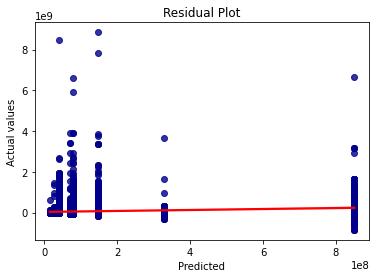

             Actual     Predicted     Residuals     Diff_in_%
5131   4.100000e+07  4.100659e+07 -6.593311e+03      0.016081
4193   4.100000e+07  4.100659e+07 -6.593311e+03      0.016081
1466   8.500000e+08  8.502062e+08 -2.062484e+05      0.024265
1413   8.500000e+08  8.502062e+08 -2.062484e+05      0.024265
10614  8.500000e+08  8.502062e+08 -2.062484e+05      0.024265
...             ...           ...           ...           ...
666    6.000000e+06  8.502062e+08 -8.442062e+08  14070.104140
8185   1.000000e+06  1.477057e+08 -1.467057e+08  14670.567570
1025   1.200000e+06  3.274003e+08 -3.262003e+08  27183.355509
7571   2.500000e+06  8.502062e+08 -8.477062e+08  33908.249936
7      1.200000e+06  8.502062e+08 -8.490062e+08  70750.520700

[10955 rows x 4 columns]


In [58]:
tree_regressor_1=DecisionTreeRegressor()
 
# Carrying Hyper Parameter Optuna Optimization using a Bayesian Optimizer;
def objective(trial):
    params ={
    'max_depth': trial.suggest_int('max_depth', 3, 15),
    }
    tree_regressor_1.set_params(**params)

    return np.mean(cross_val_score(tree_regressor_1,xtrain_1,ytrain_1, cv=5, scoring='neg_mean_squared_error'))

study = optuna.create_study()
study.optimize(objective, n_trials=15)

tree_model_1 = tree_regressor_1.set_params(**study.best_params)


# Fit the model
model,metrics_table_1c = regression_model_1(tree_model_1)

In [59]:
metrics_table_1c.index=['Decision_tree_experiment_1']
metrics_table_1c

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Decision_tree_experiment_1,1.027099e+08,1.013519e+17,3.183582e+08,0.210633


# XGBOOST REGRESSOR

### ABOUT XGBOOST
XGBoost was the first of The Big Three gradient boosting frameworks, released in 2014. The other two are LightGBM by Microsoft and launched in 2016, and CatBoost by Yandex, launched in 2017. Each of these frameworks are magnificent tools to tackling tabular data problems, using either regression or classification.


**What is 'boosting'?**<BR>
First there was a tree. The underlying element of these technique is the decision tree. Decision trees were one of the first algorithms, dating back to the 1980s with examples such as CART, and ID3, C4.5 and C5.0 by Quinlan. Trees are wonderfully intuitive leading to easily interpretable results. In view of this the most important hyperparameter for the DecisionTreeRegressor is the max_depth, although being a tree perhaps this should have really been called the maximum height... However, despite the appealing aspects such as few hyperparameters and interpretability, the drawback of decision trees is their high variance; a slight change in the input data can lead to a radically different tree structure. A similar thing can happen if there are collinear variables present. Sometimes individual decision trees are know as weak predictors, or weak learners.


Then we have a forest. As we all know, listening to many opinions and taking an average leads to a more balanced consensus. With this in mind, why not randomly plant a lot of trees and then ensemble them into one aggregate output. Each of the trees are slightly different in that they are grown from a subset (for example  n−−√  of  n ) of randomly selected features, which are taken from a "bootstrapped" copy of the dataset which consists of  ≈63%  samples taken (with replacement) from the original dataset. We now have the random forest, which outperforms the individual decision tree. 


 Random forests are great in reducing the variance with respect to a single decision tree, are particularly immune to overfitting, and are wonderful for obtaining a baseline score against which to compare more extravagant techniques. For more details see the introduction by Breiman and Cutler who invented the Random Forest in the early 2000's. With the RandomForestRegressor the most important hyperparameters are now max_depth as before, as well as n_estimators; which is the number of trees in the forest.

Gradient boosting. This time, instead of simultaneously planting a load of independent trees all at once at random (bootstrapping and aggregating aka. bagging), each successive tree that we plant is weighted in such a way as to compensate for any weakness (residual errors) in the previous tree. This is known as boosting. We have the hyperparameters max_depth, n_estimators as before, and now we have a learning_rate hyperparameter which is between 0 and 1, and controls the amount of shrinkage when creating each successive new tree.

GPU Useage: For large and computationally intensive problems XGBoost has GPU support and thus can be ran on GPU's rather than on the CPU. This can be done by using the parameter

XGBRegressor(tree_method='gpu_hist')
    
SOURCE: https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
    

[I 2023-01-03 15:33:36,349] A new study created in memory with name: no-name-98cf23a0-1342-44df-8a32-595953ff941e
[I 2023-01-03 15:33:38,299] Trial 0 finished with value: -0.7079874298009488 and parameters: {'max_depth': 5, 'n_estimators': 42, 'learning_rate': 0.013691318838609927}. Best is trial 0 with value: -0.7079874298009488.
[I 2023-01-03 15:33:48,336] Trial 1 finished with value: -0.4068942929654991 and parameters: {'max_depth': 4, 'n_estimators': 289, 'learning_rate': 0.009955483744910879}. Best is trial 0 with value: -0.7079874298009488.
[I 2023-01-03 15:33:58,823] Trial 2 finished with value: -0.3987943935053418 and parameters: {'max_depth': 3, 'n_estimators': 375, 'learning_rate': 0.012217476933806605}. Best is trial 0 with value: -0.7079874298009488.
[I 2023-01-03 15:34:07,774] Trial 3 finished with value: -0.5422287669159174 and parameters: {'max_depth': 6, 'n_estimators': 155, 'learning_rate': 0.006198413404337378}. Best is trial 0 with value: -0.7079874298009488.
[I 2023

Train_Mean_absolute_error --- 132907226.90607025
Train_R2_score --- 0.043957466464010664
Train_Mean_squared_error --- 1.2275242380972717e+17
Train_Root_mean_squared_error --- 350360419.8674947
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.037012421852576805
Train_Normalised_rmse --- 0.038930937616207535




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

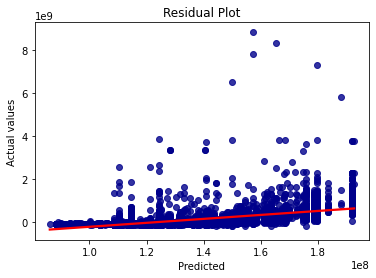

           Actual    Predicted    Residuals     Diff_in_%
2537  130000000.0  129962912.0      37088.0      0.028529
3485  150000000.0  149948704.0      51296.0      0.034197
1290  125000000.0  124931288.0      68712.0      0.054970
5304  125000000.0  124931288.0      68712.0      0.054970
4084  125000000.0  124931288.0      68712.0      0.054970
...           ...          ...          ...           ...
2283     710000.0  110414640.0 -109704640.0  15451.357746
4289     710000.0  128150152.0 -127440152.0  17949.317183
1094     660000.0  138563200.0 -137903200.0  20894.424242
1639     500000.0  110414640.0 -109914640.0  21982.928000
8936     462837.0  110414640.0 -109951803.0  23756.052995

[10955 rows x 4 columns]


In [60]:
xgb_=xgb.XGBRegressor()

# Carrying Hyper Parameter Optuna Optimization using a Bayesian Optimizer;
def objective(trial):
    params ={
    'max_depth': trial.suggest_int('max_depth', 2, 15),
    'n_estimators': trial.suggest_int('n_estimators', 30, 500),
    'learning_rate': trial.suggest_float('learning_rate', 0.0001,0.015),
    }
    xgb_.set_params(**params)

    
    
    return np.mean(cross_val_score(xgb_,xtrain_1,ytrain_1, cv=5, scoring='neg_mean_squared_error'))
# Fit the model

study = optuna.create_study()
study.optimize(objective, n_trials=15)

xgb_model_1 = xgb_.set_params(**study.best_params)


# Fit the model
model,metrics_table_1d = regression_model_1(xgb_model_1)

In [61]:
metrics_table_1d.index=['XGBoost_Regression_experiment_1']

# RANDOM FOREST REGRESSION

[I 2023-01-03 15:38:23,738] A new study created in memory with name: no-name-1c7682ef-d7b7-4c97-affe-5d10c6e3c3c6
[I 2023-01-03 15:38:28,962] Trial 0 finished with value: -0.4565822948359518 and parameters: {'max_depth': 7, 'n_estimators': 313, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.4565822948359518.
[I 2023-01-03 15:38:36,078] Trial 1 finished with value: -0.43610035857775814 and parameters: {'max_depth': 9, 'n_estimators': 405, 'max_features': 'log2'}. Best is trial 0 with value: -0.4565822948359518.
[I 2023-01-03 15:38:38,496] Trial 2 finished with value: -0.38730592591614477 and parameters: {'max_depth': 13, 'n_estimators': 96, 'max_features': 'log2'}. Best is trial 0 with value: -0.4565822948359518.
[I 2023-01-03 15:38:45,612] Trial 3 finished with value: -0.4361386573091549 and parameters: {'max_depth': 9, 'n_estimators': 407, 'max_features': 'log2'}. Best is trial 0 with value: -0.4565822948359518.
[I 2023-01-03 15:38:46,914] Trial 4 finished with value: -0.4792

Train_Mean_absolute_error --- 119895252.53777687
Train_R2_score --- -0.011321360183378815
Train_Mean_squared_error --- 1.2985002639360778e+17
Train_Root_mean_squared_error --- 360347091.55702615
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- -0.01866797052402136
Train_Normalised_rmse --- 0.04004062487107991




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

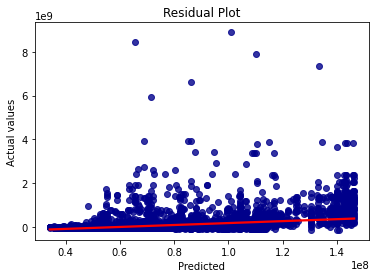

          Actual     Predicted     Residuals     Diff_in_%
4456  80000000.0  7.999999e+07  1.338249e+01      0.000017
789   80000000.0  7.999873e+07  1.267380e+03      0.001584
4757  80000000.0  7.998768e+07  1.231890e+04      0.015399
4955  90000000.0  9.002233e+07 -2.233311e+04      0.024815
10    70000000.0  7.002522e+07 -2.522432e+04      0.036035
...          ...           ...           ...           ...
7      1200000.0  1.304313e+08 -1.292313e+08  10769.272389
8185   1000000.0  1.089333e+08 -1.079333e+08  10793.329722
1094    660000.0  8.886792e+07 -8.820792e+07  13364.836200
8936    462837.0  6.408979e+07 -6.362695e+07  13747.162006
1639    500000.0  8.598867e+07 -8.548867e+07  17097.733282

[10955 rows x 4 columns]


In [62]:
forest=RandomForestRegressor()

# Carrying Hyper Parameter Optuna Optimization using a Bayesian Optimizer;
def objective(trial):
    params ={
    'max_depth': trial.suggest_int('max_depth', 2, 15),
    'n_estimators': trial.suggest_int('n_estimators', 30, 500),
    'max_features': trial.suggest_categorical('max_features', ['auto','sqrt','log2']),
    }
    forest.set_params(**params)

    
    
    return np.mean(cross_val_score(forest,xtrain_1,ytrain_1, cv=5, scoring='neg_mean_squared_error'))
# Fit the model

study = optuna.create_study()
study.optimize(objective, n_trials=15)

forest_model_1 = forest.set_params(**study.best_params)


# Fit the model
model,metrics_table_1e = regression_model_1(forest_model_1)

In [63]:
metrics_table_1e.index=['Random_forest_experiment_1']

# ADABOOST

[I 2023-01-03 15:39:30,466] A new study created in memory with name: no-name-02bc6e46-aa2b-4b71-96d2-64b6257907bf
[I 2023-01-03 15:39:33,884] Trial 0 finished with value: -0.6116198822963211 and parameters: {'n_estimators': 225, 'learning_rate': 0.46988604203607043}. Best is trial 0 with value: -0.6116198822963211.
[I 2023-01-03 15:39:36,084] Trial 1 finished with value: -0.6229057132600467 and parameters: {'n_estimators': 207, 'learning_rate': 0.8103621627796231}. Best is trial 1 with value: -0.6229057132600467.
[I 2023-01-03 15:39:38,149] Trial 2 finished with value: -0.6185176324016399 and parameters: {'n_estimators': 270, 'learning_rate': 0.843694980594371}. Best is trial 1 with value: -0.6229057132600467.
[I 2023-01-03 15:39:40,444] Trial 3 finished with value: -0.6060037508708874 and parameters: {'n_estimators': 196, 'learning_rate': 0.6376901865481237}. Best is trial 1 with value: -0.6229057132600467.
[I 2023-01-03 15:39:42,436] Trial 4 finished with value: -0.6375112736384464 a

Train_Mean_absolute_error --- 116825050.35321306
Train_R2_score --- 0.02709133358509963
Train_Mean_squared_error --- 1.2491797462839827e+17
Train_Root_mean_squared_error --- 353437370.1639348
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.020023767180798235
Train_Normalised_rmse --- 0.03927283856519083




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

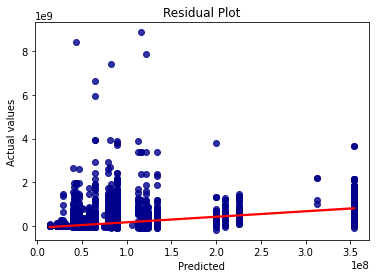

            Actual     Predicted     Residuals    Diff_in_%
1547  8.900000e+07  8.903944e+07 -3.943837e+04     0.044313
3395  8.900000e+07  8.903944e+07 -3.943837e+04     0.044313
3853  3.100000e+07  3.101474e+07 -1.474090e+04     0.047551
6906  8.200000e+07  8.192725e+07  7.275446e+04     0.088725
3224  7.500000e+07  7.510278e+07 -1.027779e+05     0.137037
...            ...           ...           ...          ...
4289  7.100000e+05  4.086095e+07 -4.015095e+07  5655.063303
7     1.200000e+06  8.263304e+07 -8.143304e+07  6786.086435
1094  6.600000e+05  4.710450e+07 -4.644450e+07  7037.045415
8936  4.628370e+05  4.067086e+07 -4.020803e+07  8687.297088
8185  1.000000e+06  8.903944e+07 -8.803944e+07  8803.943837

[10955 rows x 4 columns]


In [64]:
adaboost=AdaBoostRegressor()


# Carrying Hyper Parameter Optuna Optimization using a Bayesian Optimizer;
def objective(trial):
    params ={
    'n_estimators': trial.suggest_int('n_estimators', 30, 500),
    'learning_rate': trial.suggest_float('learning_rate', 0.0001,1.0),
    }
    adaboost.set_params(**params)

    
    
    return np.mean(cross_val_score(adaboost,xtrain_1,ytrain_1, cv=5, scoring='neg_mean_squared_error'))
# Fit the model

study = optuna.create_study()
study.optimize(objective, n_trials=15)
adaboost_model_1 = adaboost.set_params(**study.best_params)


# Fit the model
model,metrics_table_1f = regression_model_1(adaboost_model_1)


In [65]:
metrics_table_1f.index=['Adaboost_experiment_1']

# EXPERIMENT 2
FEATURE ENGINEERING:
  - Removing outliers from the target variable
  - Reducing high cardinality by replacing values less than 30 with 'others'
  - Adding a new column
  - Encoding columns with OneHotEncoder
  - Hyperparameter tuning with GridSearchCV

In [66]:
train_copy=train.copy()
test_copy=test.copy()

In [67]:
# Outlier removal
def Remove_Outliers(data):
    '''This function removes outliers from the data variable. 
    It filters out outliers above the 99th quantile and below 1st quantile'''

    mini,maxi=data['price'].quantile([0.01,0.99])

    mask = data['price'].between(mini,maxi)

    data=data[mask]
    return data


In [68]:
train_copy_2=Remove_Outliers(train_copy)

test_copy_2=Remove_Outliers(test_copy)


In [69]:
ytrain_2=train_copy_2['price']
xtrain_2=train_copy_2.drop(['price'],axis=1)

<AxesSubplot:xlabel='price', ylabel='Density'>

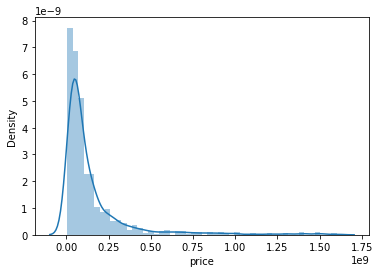

In [70]:
sns.distplot(ytrain_2)

# FEATURE ENGINEERING 2

In [71]:
#adding a new column
xtrain_2['total_rooms'] = xtrain_2['bedrooms'] + xtrain_2['bathrooms'] + xtrain_2['toilets']


## Adding a step to replace high cardinality variables with 'others' in the pipeline

for i in xtrain_2.select_dtypes('O').columns:
    value_counts = xtrain_2[i].value_counts()
    to_replace = value_counts[value_counts <= 30].index
    xtrain_2[i].replace(to_replace, 'Others', inplace=True)

xtrain_2=pd.get_dummies(xtrain_2)       

# MODEL BUILDING 2

In [72]:
def regression_model_2(model):
    
    model.fit(xtrain_2,ytrain_2)
    
    train_pred=model.predict(xtrain_2)
    
    r2score=r2_score(ytrain_2,train_pred)
    
    mae=mean_absolute_error(train_pred,ytrain_2)
    
    mse=mean_squared_error(ytrain_2,train_pred)
    
     #to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
    # A RMSE value lower than the standard deviation indicates good model performance
    
    std=np.std(ytrain_1)
    
    root_mean_squared_error=np.sqrt(mse)
    
    normalised_rmse=root_mean_squared_error/(ytrain_2.max()- ytrain_2.min())
    
    
    n=xtrain_2.shape[0]
    p=xtrain_2.shape[1]
    adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)
    
    
    
    
   
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Standard deviation of dependent variable','---',std)

    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    
    sns.regplot(x=train_pred,y=ytrain_2)
    plt.title('Predicted vs Actual ')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    stat=pd.DataFrame(ytrain_2)
    
    stat['Predicted']=train_pred
    
    stat.rename(columns={0:'Actual'},inplace=True)

    stat['Residuals']=stat.iloc[:,0] - stat['Predicted']

    stat['Diff_in_%']=abs((stat['Residuals']/stat.iloc[:,0])*100)
    
    metrics_table_2 = pd.DataFrame({'Mean_absolute_error':mae,
                                   'Mean_squared_error':mse,
                                   'Root_mean_squared_error':root_mean_squared_error,
                                   'R2_score':r2score},index=[model])





    #to view all data
    pd.options.display.max_rows=1000
    stat= stat.sort_values(by='Diff_in_%')
    print(stat)
    return model,metrics_table_2
    
def regression_weights(model):
    model.fit(xtrain_2,ytrain_2)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept


# PIPELINE 2

In [73]:
'''from sklearn.base import BaseEstimator, TransformerMixin

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy

# Add a step to replace high cardinality variables with 'others' in the pipeline
class ReplaceHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10):
        self.threshold = threshold
        
    def fit(self, X, y):
        return self
      
   
    def transform(self,X,y=None):
        X_copy = X.copy()

        # Add a step to replace high cardinality variables with 'others' in the pipeline
        for i in X_copy.select_dtypes('O').columns:
            value_counts = X_copy[i].value_counts()
            to_replace = value_counts[value_counts <= self.threshold].index
            X_copy[i].replace(to_replace, 'others', inplace=True)
            return X_copy'''


"from sklearn.base import BaseEstimator, TransformerMixin\n\n# Add a step to create new columns in the pipeline\nclass FeatureUp(BaseEstimator, TransformerMixin):\n    def fit(self, X, y):\n        return self\n    def transform(self, X, y=None):\n        X_copy = X.copy()\n        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']\n        return X_copy\n\n# Add a step to replace high cardinality variables with 'others' in the pipeline\nclass ReplaceHighCardinality(BaseEstimator, TransformerMixin):\n    def __init__(self, threshold=10):\n        self.threshold = threshold\n        \n    def fit(self, X, y):\n        return self\n      \n   \n    def transform(self,X,y=None):\n        X_copy = X.copy()\n\n        # Add a step to replace high cardinality variables with 'others' in the pipeline\n        for i in X_copy.select_dtypes('O').columns:\n            value_counts = X_copy[i].value_counts()\n            to_replace = value_counts[value_counts <= s

# RIDGE REGRESSION

Train_Mean_absolute_error --- 82882686.65630972
Train_R2_score --- 0.5203315901648604
Train_Mean_squared_error --- 2.382959369628163e+16
Train_Root_mean_squared_error --- 154368370.12899253
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5167828165764565
Train_Normalised_rmse --- 0.0968433940583391




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

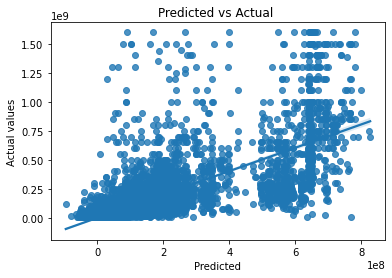

             price     Predicted     Residuals     Diff_in_%
10521   98000000.0  9.800977e+07 -9.766264e+03      0.009966
11      45000000.0  4.499353e+07  6.473466e+03      0.014385
1017   185000000.0  1.849532e+08  4.683411e+04      0.025316
2536    65000000.0  6.497503e+07  2.497333e+04      0.038421
12695   45000000.0  4.502103e+07 -2.103163e+04      0.046737
...            ...           ...           ...           ...
4932     7000000.0  1.960987e+08 -1.890987e+08   2701.410312
7302     6000000.0  2.243950e+08 -2.183950e+08   3639.915993
2640     7200000.0  2.886839e+08 -2.814839e+08   3909.499195
4839     8700000.0  7.673937e+08 -7.586937e+08   8720.616687
15947    6000000.0  6.358364e+08 -6.298364e+08  10497.273620

[10758 rows x 4 columns]


In [74]:
      
ridge=Ridge()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

ridge_regressor_2=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
        

# Fit the model
model,metrics_table_2=regression_model_2(ridge_regressor_2)


In [75]:
metrics_table_2.index=['Ridge_experiment_2']

# LASSO REGRESSION

Train_Mean_absolute_error --- 82934719.65832812
Train_R2_score --- 0.520433602121423
Train_Mean_squared_error --- 2.3824525813078972e+16
Train_Root_mean_squared_error --- 154351954.354582
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.516885583257178
Train_Normalised_rmse --- 0.0968330955800389




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

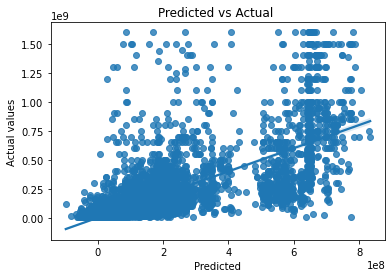

             price     Predicted     Residuals     Diff_in_%
4356   145000000.0  1.449997e+08  2.688063e+02      0.000185
5294    42000000.0  4.199963e+07  3.663103e+02      0.000872
17825  650000000.0  6.500065e+08 -6.450372e+03      0.000992
5775   134000000.0  1.340157e+08 -1.565395e+04      0.011682
10633   65000000.0  6.500864e+07 -8.638235e+03      0.013290
...            ...           ...           ...           ...
4932     7000000.0  1.936642e+08 -1.866642e+08   2666.631087
7302     6000000.0  2.223118e+08 -2.163118e+08   3605.196349
2640     7200000.0  2.911419e+08 -2.839419e+08   3943.637622
4839     8700000.0  7.744455e+08 -7.657455e+08   8801.672249
15947    6000000.0  6.380176e+08 -6.320176e+08  10533.625914

[10758 rows x 4 columns]


In [76]:
      
        
lasso=Lasso()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

lasso_regressor_2=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
        


# Fit the model
model,metrics_table_2a=regression_model_2(lasso_regressor_2)


In [77]:
metrics_table_2a.index=['Lasso_experiment_2']

# ELASTIC NET REGRESSION

Train_Mean_absolute_error --- 82866792.52074505
Train_R2_score --- 0.5201424100551777
Train_Mean_squared_error --- 2.3838992032833972e+16
Train_Root_mean_squared_error --- 154398808.39188486
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5165922368386914
Train_Normalised_rmse --- 0.09686248958085625




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

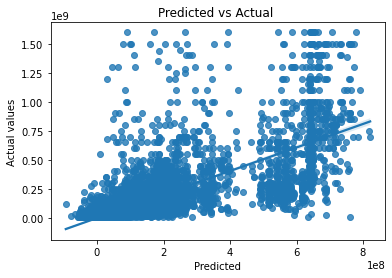

             price     Predicted     Residuals     Diff_in_%
6734   155000000.0  1.549973e+08  2.731389e+03      0.001762
17386   25000000.0  2.499527e+07  4.729792e+03      0.018919
21322  550000000.0  5.498170e+08  1.829576e+05      0.033265
6087    80000000.0  7.996569e+07  3.431097e+04      0.042889
20376  120000000.0  1.199319e+08  6.810500e+04      0.056754
...            ...           ...           ...           ...
4932     7000000.0  1.974960e+08 -1.904960e+08   2721.371417
7302     6000000.0  2.259047e+08 -2.199047e+08   3665.079140
2640     7200000.0  2.867740e+08 -2.795740e+08   3882.971909
4839     8700000.0  7.619198e+08 -7.532198e+08   8657.698307
15947    6000000.0  6.341372e+08 -6.281372e+08  10468.954144

[10758 rows x 4 columns]


In [78]:

enet=ElasticNet()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

enet_regressor_2=GridSearchCV(enet,parameters,scoring='neg_mean_squared_error',cv=5)
        

# Fit the model
model,metrics_table_2b =regression_model_2(enet_regressor_2) 


In [79]:
metrics_table_2b.index=['Elastic_Net_experiment_2']

# DECISION TREE REGRESSOR

Train_Mean_absolute_error --- 78975582.76991062
Train_R2_score --- 0.5796976777549081
Train_Mean_squared_error --- 2.0880327666661456e+16
Train_Root_mean_squared_error --- 144500268.7425233
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5765881175884573
Train_Normalised_rmse --- 0.09065261527134462




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

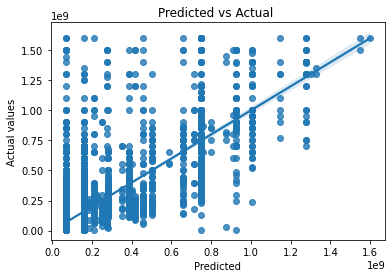

              price     Predicted     Residuals     Diff_in_%
11005  1.600000e+09  1.600000e+09  0.000000e+00      0.000000
13182  1.300000e+09  1.300000e+09  0.000000e+00      0.000000
8212   7.500000e+08  7.494146e+08  5.853659e+05      0.078049
1348   7.500000e+08  7.494146e+08  5.853659e+05      0.078049
12906  7.500000e+08  7.494146e+08  5.853659e+05      0.078049
...             ...           ...           ...           ...
19654  6.000000e+06  1.604175e+08 -1.544175e+08   2573.625392
18825  3.000000e+07  8.750000e+08 -8.450000e+08   2816.666667
2640   7.200000e+06  2.123925e+08 -2.051925e+08   2849.896480
4839   8.700000e+06  9.235146e+08 -9.148146e+08  10515.110153
15947  6.000000e+06  7.494146e+08 -7.434146e+08  12390.243902

[10758 rows x 4 columns]


In [80]:
 
tree_regressor_=DecisionTreeRegressor()


parameters = {"max_depth":    [1,2,3,4,5,],
             }

# try out every combination of the above values
tree_regressor_2 = GridSearchCV(tree_regressor_, parameters, scoring='neg_mean_squared_error',cv=3)


# Fit the model
model,metrics_table_2c = regression_model_2(tree_regressor_2)


In [81]:
metrics_table_2c.index=['Decision_Tree_experiment_2']

# RANDOM FOREST

Train_Mean_absolute_error --- 66949011.96860613
Train_R2_score --- 0.6835523802686235
Train_Mean_squared_error --- 1.5720898124072602e+16
Train_Root_mean_squared_error --- 125383005.72275576
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6812111776128098
Train_Normalised_rmse --- 0.07865935114351051




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

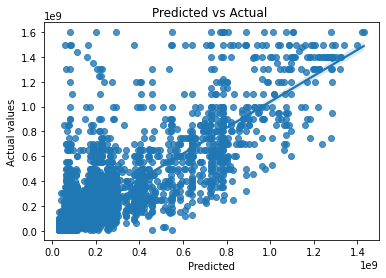

             price     Predicted     Residuals    Diff_in_%
2287    55000000.0  5.496504e+07  3.495666e+04     0.063558
8749    55000000.0  5.504121e+07 -4.121457e+04     0.074936
7477    55000000.0  5.504121e+07 -4.121457e+04     0.074936
7438    55000000.0  5.504121e+07 -4.121457e+04     0.074936
5720   255000000.0  2.551963e+08 -1.962561e+05     0.076963
...            ...           ...           ...          ...
2640     7200000.0  1.873792e+08 -1.801792e+08  2502.489408
2811     7000000.0  2.089245e+08 -2.019245e+08  2884.635541
7361     8500000.0  2.556770e+08 -2.471770e+08  2907.964431
4839     8700000.0  5.514242e+08 -5.427242e+08  6238.209525
15947    6000000.0  4.590740e+08 -4.530740e+08  7551.233257

[10758 rows x 4 columns]


In [82]:
forest=RandomForestRegressor()

        


parameters = {"n_estimators": [80,100,150,200,500],
              'max_depth': [4,5,6,7,8],
              'max_features':['auto','sqrt','log2'],}



# try out every combination of the above values
forest_2 = GridSearchCV(forest, parameters, scoring='neg_mean_squared_error',cv=3)



# Fit the model
model,metrics_table_2e = regression_model_2(forest_2)


In [83]:
metrics_table_2e.index=['Random_forest_experiment_2']

# XGBOOST REGRESSION

Train_Mean_absolute_error --- 67195770.28434654
Train_R2_score --- 0.6557553526997477
Train_Mean_squared_error --- 1.7101835161719742e+16
Train_Root_mean_squared_error --- 130773985.03417927
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6532084968150578
Train_Normalised_rmse --- 0.08204139588091548




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

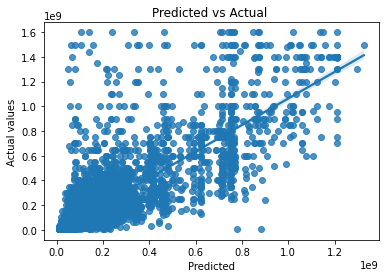

             price    Predicted    Residuals     Diff_in_%
3392   830000000.0  830010368.0     -10368.0      0.001249
18250  160000000.0  160007456.0      -7456.0      0.004660
13573   80000000.0   80007040.0      -7040.0      0.008800
19101   70000000.0   70006464.0      -6464.0      0.009234
8096   900000000.0  899881600.0     118400.0      0.013156
...            ...          ...          ...           ...
7302     6000000.0  169618928.0 -163618928.0   2726.982133
2640     7200000.0  207872880.0 -200672880.0   2787.123333
20088    6500000.0  198672384.0 -192172384.0   2956.498215
4839     8700000.0  882984704.0 -874284704.0  10049.249471
15947    6000000.0  776432000.0 -770432000.0  12840.533333

[10758 rows x 4 columns]


In [84]:
        
xgb_=xgb.XGBRegressor()


parameters = {"max_depth":    [2,3,4,5,],
              "n_estimators": [80,100,150,200,500],
              "learning_rate": [0.0001,0.001,0.01, 0.015]}

# try out every combination of the above values
xgb_regressor_2 = GridSearchCV(xgb_, parameters, scoring='neg_mean_squared_error',cv=3)



# Fit the model
model,metrics_table_2d = regression_model_2(xgb_regressor_2)


In [85]:
metrics_table_2d.index=['XGBoost_Experiment_2']


# ADABOOST

Train_Mean_absolute_error --- 85966052.10006872
Train_R2_score --- 0.5053211375712681
Train_Mean_squared_error --- 2.457530256342495e+16
Train_Root_mean_squared_error --- 156765119.09039253
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5016613108123367
Train_Normalised_rmse --- 0.09834700068406056




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

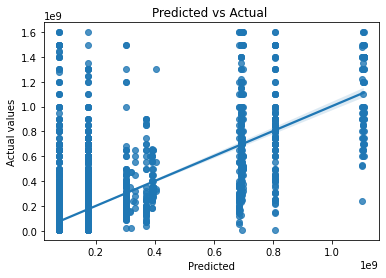

            price     Predicted     Residuals     Diff_in_%
1884   77000000.0  7.684074e+07  1.592646e+05      0.206837
12101  77000000.0  7.684074e+07  1.592646e+05      0.206837
23757  77000000.0  7.684074e+07  1.592646e+05      0.206837
9378   77000000.0  7.684074e+07  1.592646e+05      0.206837
14580  77000000.0  7.684074e+07  1.592646e+05      0.206837
...           ...           ...           ...           ...
7302    6000000.0  1.743231e+08 -1.683231e+08   2805.385531
14643   6000000.0  1.743231e+08 -1.683231e+08   2805.385531
1955    6000000.0  1.743231e+08 -1.683231e+08   2805.385531
4839    8700000.0  8.076084e+08 -7.989084e+08   9182.855137
15947   6000000.0  6.960597e+08 -6.900597e+08  11500.995025

[10758 rows x 4 columns]


In [86]:
adaboost_2=AdaBoostRegressor()

parameters = {"n_estimators": [80,100,150,200,500],
              "learning_rate": [0.0001,0.001,0.01, 0.015]}

# try out every combination of the above values
adaboost_regressor_2 = GridSearchCV(adaboost_2, parameters, scoring='neg_mean_squared_error',cv=3)



model,metrics_table_2f = regression_model_2(adaboost_regressor_2)


In [87]:
metrics_table_2f.index=['Adaboost_experiment_2']


# EXPERIMENT 3:
**FEATURE ENGINEERING:**
  - Log transformation of target variable
  - Reducing high cardinality by replacing values less than 30 with 'others'
  - Adding a new column
  - Encoding columns with OneHotEncoder
  - No Hyperparameter tuning

In [88]:
train_copy=train.copy()
test_copy=test.copy()




ytrain_3=np.log(train_copy['price'])

xtrain_3=train_copy.drop(['price'],axis=1)




ytest=np.log(test_copy['price'])
xtest_3= test_copy.drop(['price'],axis=1)

In [89]:
#adding a new column
xtrain_3['total_rooms'] = xtrain_3['bedrooms'] + xtrain_3['bathrooms'] + xtrain_3['toilets']


## Adding a step to replace high cardinality variables with 'others' in the pipeline

for i in xtrain_3.select_dtypes('O').columns:
    value_counts = xtrain_3[i].value_counts()
    to_replace = value_counts[value_counts <= 30].index
    xtrain_3[i].replace(to_replace, 'Others', inplace=True)

xtrain_3=pd.get_dummies(xtrain_3)       

### MODEL BUILDING 3

In [90]:
def regression_model_3(model):
    
    model.fit(xtrain_3,ytrain_3)
    
    train_pred=model.predict(xtrain_3)
    
    #reversing log transformation
    pred_inverse=np.exp(train_pred)
    ytrain_inverse=np.exp(ytrain_3)
    
    r2score=r2_score(ytrain_inverse,pred_inverse)
    
    mae=mean_absolute_error(pred_inverse,ytrain_inverse)
    
    mse=mean_squared_error(ytrain_inverse,pred_inverse)
    
     #to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
    # A RMSE value lower than the standard deviation indicates good model performance
    
    std=np.std(ytrain_inverse)
    
    root_mean_squared_error=np.sqrt(mse)
    
    normalised_rmse=root_mean_squared_error/(ytrain_inverse.max()- ytrain_inverse.min())
    
    
    n=xtrain_3.shape[0]
    p=xtrain_3.shape[1]
    adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)
    
    
    
    
   
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Standard deviation of dependent variable','---',std)

    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    
    sns.regplot(x=pred_inverse,y=ytrain_inverse)
    plt.title('Predicted vs Actual ')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    stat=pd.DataFrame(ytrain_inverse)
    
    stat['Predicted']=pred_inverse
    
    stat.rename(columns={0:'Actual'},inplace=True)

    stat['Residuals']=stat.iloc[:,0] - stat['Predicted']

    stat['Diff_in_%']=abs((stat['Residuals']/stat.iloc[:,0])*100)



    #to view all data
    pd.options.display.max_rows=1000
    stat= stat.sort_values(by='Diff_in_%')
    print(stat)
    metrics_table_3 = pd.DataFrame({'Mean_absolute_error':mae,
                                    'Mean_squared_error':mse,
                                    'Root_mean_squared_error':root_mean_squared_error,
                                    'R2_score':r2score},index=[model])



    
    return model,metrics_table_3

def regression_weights(model):
    model.fit(xtrain_3,ytrain_3)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept


### PIPELINE 3

In [91]:

'''from sklearn.base import BaseEstimator, TransformerMixin

# Add a log transformation step to the pipeline
#class LogTransformer(BaseEstimator, TransformerMixin):
 #   def fit(self, X, y):
  #      return self
   # def transform(self, X, y=None):
    #    return np.log1p(X)
    

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy

# Add a step to replace high cardinality variables with 'others' in the pipeline
class ReplaceHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=15):
        self.threshold = threshold
        
    def fit(self, X, y):
        return self
    
    #def transform(self, X, y=None):
     #   columns = np.array(X.select_dtypes(include="object").columns)
        
      #  u = np.array([X[x].nunique() for x in columns]) >= self.threshold
        
       # high_cardinal_col = columns[u]
        
        #X = X.copy().drop(columns=high_cardinal_col)
        # value_counts = xtrain[column].value_counts()
        # to_replace = value_counts[value_counts <= threshold].index
        # xtrain[column].replace(to_replace, 'others', inplace=True)
        #return X
    def transform(self,X,y=None):
        X_copy = X.copy()

        # Add a step to replace high cardinality variables with 'others' in the pipeline
        for i in X_copy.select_dtypes('O').columns:
            value_counts = X_copy[i].value_counts()
            to_replace = value_counts[value_counts <= self.threshold].index
            X_copy[i].replace(to_replace, 'others', inplace=True)
            return X_copy;'''
        
        

'from sklearn.base import BaseEstimator, TransformerMixin\n\n# Add a log transformation step to the pipeline\n#class LogTransformer(BaseEstimator, TransformerMixin):\n #   def fit(self, X, y):\n  #      return self\n   # def transform(self, X, y=None):\n    #    return np.log1p(X)\n    \n\n# Add a step to create new columns in the pipeline\nclass FeatureUp(BaseEstimator, TransformerMixin):\n    def fit(self, X, y):\n        return self\n    def transform(self, X, y=None):\n        X_copy = X.copy()\n        X_copy[\'total_rooms\'] = X_copy[\'bedrooms\'] + X_copy[\'bathrooms\'] + X_copy[\'toilets\']\n        return X_copy\n\n# Add a step to replace high cardinality variables with \'others\' in the pipeline\nclass ReplaceHighCardinality(BaseEstimator, TransformerMixin):\n    def __init__(self, threshold=15):\n        self.threshold = threshold\n        \n    def fit(self, X, y):\n        return self\n    \n    #def transform(self, X, y=None):\n     #   columns = np.array(X.select_dtypes(

## DECISION TREE REGRESSION

Train_Mean_absolute_error --- 49587116.33540912
Train_R2_score --- 0.5783930878932314
Train_Mean_squared_error --- 5.413281160685116e+16
Train_Root_mean_squared_error --- 232664590.35884932
Standard deviation of dependent variable --- 358324440.2110359
Train_Adjusted_r2 --- 0.575330380209881
Train_Normalised_rmse --- 0.025852950673442197




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

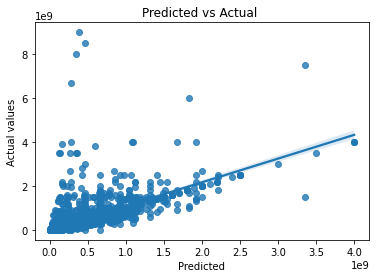

             price     Predicted     Residuals     Diff_in_%
8787   260000000.0  2.600000e+08  0.000000e+00      0.000000
8859   140000000.0  1.400000e+08  0.000000e+00      0.000000
1583    40000000.0  4.000000e+07  0.000000e+00      0.000000
17717   72000000.0  7.200000e+07  0.000000e+00      0.000000
15676   85000000.0  8.500000e+07  0.000000e+00      0.000000
...            ...           ...           ...           ...
1053     1750000.0  2.757667e+08 -2.740167e+08  15658.097928
13433    1300000.0  2.757667e+08 -2.744667e+08  21112.824134
14555     660000.0  1.583232e+08 -1.576632e+08  23888.369391
19750    2500000.0  6.615789e+08 -6.590789e+08  26363.154847
15169    1200000.0  4.579642e+08 -4.567642e+08  38063.679730

[10955 rows x 4 columns]


In [92]:
tree_regressor_3 = DecisionTreeRegressor()
 

# Fit the model
model,metrics_table_3c = regression_model_3(tree_regressor_3)

In [93]:
metrics_table_3c.index=['Decision_tree_experiment_3']
metrics_table_3c

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Decision_tree_experiment_3,4.958712e+07,5.413281e+16,2.326646e+08,0.578393


## RIDGE REGRESSION

Train_Mean_absolute_error --- 87096127.14076594
Train_R2_score --- 0.30223335855851885
Train_Mean_squared_error --- 8.959072790801752e+16
Train_Root_mean_squared_error --- 299317102.5985944
Standard deviation of dependent variable --- 358324440.2110359
Train_Adjusted_r2 --- 0.2971645250252888
Train_Normalised_rmse --- 0.03325916624125772




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

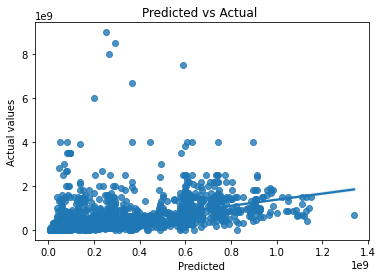

             price     Predicted     Residuals     Diff_in_%
6517   100000000.0  9.999410e+07  5.904409e+03      0.005904
12595  100000000.0  1.000071e+08 -7.118118e+03      0.007118
20606   15000000.0  1.499787e+07  2.131205e+03      0.014208
3040   100000000.0  9.998002e+07  1.998317e+04      0.019983
597    140000000.0  1.399683e+08  3.165256e+04      0.022609
...            ...           ...           ...           ...
1491     1200000.0  3.519067e+08 -3.507067e+08  29225.557114
6724     1000000.0  4.368700e+08 -4.358700e+08  43586.996125
2449      462837.0  2.046097e+08 -2.041469e+08  44107.725778
15169    1200000.0  5.781314e+08 -5.769314e+08  48077.616995
14555     660000.0  3.586156e+08 -3.579556e+08  54235.696423

[10955 rows x 4 columns]


In [94]:
ridge_regressor_3 = Ridge()

# Fit the model
model,metrics_table_3=regression_model_3(ridge_regressor_3)


In [95]:
metrics_table_3.index=['Ridge_experiment_3']
metrics_table_3

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Ridge_experiment_3,8.709613e+07,8.959073e+16,2.993171e+08,0.302233


## ELASTIC NET REGRESSION

Train_Mean_absolute_error --- 122355807.23353826
Train_R2_score --- -0.01004037215732545
Train_Mean_squared_error --- 1.2968555213691562e+17
Train_Root_mean_squared_error --- 360118802.8094557
Standard deviation of dependent variable --- 358324440.2110359
Train_Adjusted_r2 --- -0.01737767692977865
Train_Normalised_rmse --- 0.040015258150165725




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

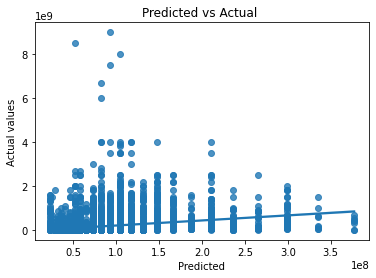

             price     Predicted     Residuals     Diff_in_%
14668  210000000.0  2.101093e+08 -1.092573e+05      0.052027
14818   58000000.0  5.796042e+07  3.958112e+04      0.068243
16983   65000000.0  6.515957e+07 -1.595705e+05      0.245493
22411   65000000.0  6.515957e+07 -1.595705e+05      0.245493
4280    65000000.0  6.515957e+07 -1.595705e+05      0.245493
...            ...           ...           ...           ...
15169    1200000.0  9.258024e+07 -9.138024e+07   7615.020054
1491     1200000.0  1.040795e+08 -1.028795e+08   8573.287785
14555     660000.0  7.325291e+07 -7.259291e+07  10998.926487
4782     1000000.0  1.170070e+08 -1.160070e+08  11600.696117
4176      500000.0  1.170070e+08 -1.165070e+08  23301.392234

[10955 rows x 4 columns]


In [96]:
enet_regressor_3 = ElasticNet()
        

# Fit the model
model,metrics_table_3b =regression_model_3(enet_regressor_3) 


In [97]:
metrics_table_3b.index=['Elastic_Net_experiment_3']
metrics_table_3b

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Elastic_Net_experiment_3,1.223558e+08,1.296856e+17,3.601188e+08,-0.01004


# RANDOM FOREST

Train_Mean_absolute_error --- 62351576.2189514
Train_R2_score --- 0.5160211570794443
Train_Mean_squared_error --- 6.214114326210461e+16
Train_Root_mean_squared_error --- 249281253.33065984
Standard deviation of dependent variable --- 358324440.2110359
Train_Adjusted_r2 --- 0.5125053567492628
Train_Normalised_rmse --- 0.027699341512309662




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

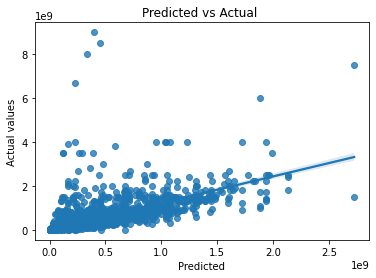

              price     Predicted     Residuals     Diff_in_%
2641   8.400000e+07  8.400258e+07 -2.579178e+03      0.003070
2994   1.105000e+07  1.104929e+07  7.096106e+02      0.006422
22827  3.750000e+07  3.750477e+07 -4.765265e+03      0.012707
17545  7.500000e+07  7.501476e+07 -1.475733e+04      0.019676
9291   1.200000e+09  1.200264e+09 -2.639667e+05      0.021997
...             ...           ...           ...           ...
1053   1.750000e+06  2.271299e+08 -2.253799e+08  12878.852814
13433  1.300000e+06  2.271299e+08 -2.258299e+08  17371.532634
14555  6.600000e+05  1.725987e+08 -1.719387e+08  26051.318239
19750  2.500000e+06  6.716475e+08 -6.691475e+08  26765.901196
15169  1.200000e+06  4.620154e+08 -4.608154e+08  38401.282362

[10955 rows x 4 columns]


In [98]:
forest_3= RandomForestRegressor()


# Fit the model
model,metrics_table_3e = regression_model_3(forest_3)


In [99]:
metrics_table_3e.index=['Random_forest_experiment_3']
metrics_table_3e

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Random_forest_experiment_3,6.235158e+07,6.214114e+16,2.492813e+08,0.516021


## XGBOOST REGRESSION

Train_Mean_absolute_error --- 72015105.55479231
Train_R2_score --- 0.4257780534944534
Train_Mean_squared_error --- 7.372803328905643e+16
Train_Root_mean_squared_error --- 271529065.27489173
Standard deviation of dependent variable --- 358324440.2110359
Train_Adjusted_r2 --- 0.4216066940669648
Train_Normalised_rmse --- 0.030171447748583654




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

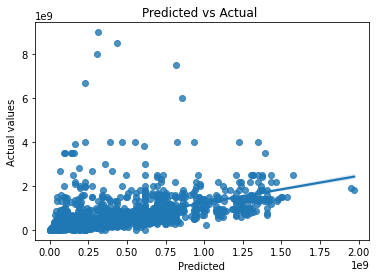

            price    Predicted    Residuals     Diff_in_%
19234  70000000.0   69987392.0      12608.0      0.018011
22897  60000000.0   59981568.0      18432.0      0.030720
11440  25000000.0   25008898.0      -8898.0      0.035592
3863   80000000.0   79969728.0      30272.0      0.037840
16690  10500000.0   10495631.0       4369.0      0.041610
...           ...          ...          ...           ...
13433   1300000.0  228746960.0 -227446960.0  17495.920000
19750   2500000.0  617840640.0 -615340640.0  24613.625600
1491    1200000.0  359584768.0 -358384768.0  29865.397333
14555    660000.0  230954336.0 -230294336.0  34893.081212
15169   1200000.0  557216256.0 -556016256.0  46334.688000

[10955 rows x 4 columns]


In [100]:
xgb_regressor_3 = xgb.XGBRegressor()


# Fit the model
model,metrics_table_3d = regression_model_3(xgb_regressor_3)


In [101]:
metrics_table_3d.index=['XGBoost_experiment_3']
metrics_table_3d

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
XGBoost_experiment_3,7.201511e+07,7.372803e+16,2.715291e+08,0.425778


# ADABOOST

Train_Mean_absolute_error --- 109512283.78911425
Train_R2_score --- 0.11265462419986505
Train_Mean_squared_error --- 1.139319557603337e+17
Train_Root_mean_squared_error --- 337538080.45957375
Standard deviation of dependent variable --- 358324440.2110359
Train_Adjusted_r2 --- 0.1062086210101445
Train_Normalised_rmse --- 0.037506159966459285




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

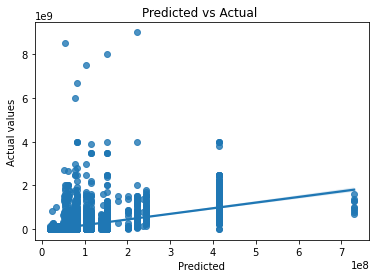

             price     Predicted     Residuals     Diff_in_%
519    115000000.0  1.149843e+08  1.574135e+04      0.013688
20038  115000000.0  1.149843e+08  1.574135e+04      0.013688
2511   115000000.0  1.149843e+08  1.574135e+04      0.013688
1604   115000000.0  1.149843e+08  1.574135e+04      0.013688
20962  115000000.0  1.149843e+08  1.574135e+04      0.013688
...            ...           ...           ...           ...
15169    1200000.0  1.026455e+08 -1.014455e+08   8453.792232
4782     1000000.0  1.149843e+08 -1.139843e+08  11398.425865
14555     660000.0  7.735595e+07 -7.669595e+07  11620.598312
2449      462837.0  6.037764e+07 -5.991481e+07  12945.120528
19750    2500000.0  4.131073e+08 -4.106073e+08  16424.291231

[10955 rows x 4 columns]


In [102]:
adaboost_3=AdaBoostRegressor()


model,metrics_table_3f = regression_model_3(adaboost_3)


In [103]:
metrics_table_3f.index=['Adaboost_experiment_3']
metrics_table_3f

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Adaboost_experiment_3,1.095123e+08,1.139320e+17,3.375381e+08,0.112655


# EXPERIMENT 4
**FEATURE ENGINEERING:**
-  Encoding with target encoding
-  Outlier Removal
-  Adding a new column
-  Hyperparameter tuning with Random Search for linear models

# FEATURE ENGINEERING

In [104]:
te=TargetEncoder()

# Outlier removal
train_copy=train.copy()
test_copy=test.copy()

train_copy_=te.fit_transform(train_copy,train_copy['price'])

def Remove_Outliers(data):
    '''This function removes outliers from the data variable. 
    It filters out outliers above the 99th quantile and below 1st quantile'''

    mini,maxi=data['price'].quantile([0.01,0.99])

    mask = data['price'].between(mini,maxi)

    data=data[mask]
    return data

train_copy_4=Remove_Outliers(train_copy_)

test_copy_4=Remove_Outliers(train_copy_)

ytrain_4=train_copy_4['price']
xtrain_4=train_copy_4.drop(['price'],axis=1)

#adding a new column
xtrain_4['total_rooms'] = xtrain_4['bedrooms'] + xtrain_4['bathrooms'] + xtrain_4['toilets']

# MODEL BUILDING 4

In [105]:
def regression_model_4(model):
    
    model.fit(xtrain_4,ytrain_4)
    
    train_pred=model.predict(xtrain_4)
    
    r2score=r2_score(ytrain_4,train_pred)
    
    mae=mean_absolute_error(train_pred,ytrain_4)
    
    mse=mean_squared_error(ytrain_4,train_pred)
    
     #to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
    # A RMSE value lower than the standard deviation indicates good model performance
    
    std=np.std(ytrain_1)
    
    root_mean_squared_error=np.sqrt(mse)
    
    normalised_rmse=root_mean_squared_error/(ytrain_4.max()- ytrain_4.min())
    
    
    n=xtrain_4.shape[0]
    p=xtrain_4.shape[1]
    adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)
    
    
    
    
   
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Standard deviation of dependent variable','---',std)

    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    
    sns.regplot(x=train_pred,y=ytrain_4)
    plt.title('Predicted vs Actual ')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    stat=pd.DataFrame(ytrain_4)
    
    stat['Predicted']=train_pred
    
    stat.rename(columns={0:'Actual'},inplace=True)

    stat['Residuals']=stat.iloc[:,0] - stat['Predicted']

    stat['Diff_in_%']=abs((stat['Residuals']/stat.iloc[:,0])*100)



    #to view all data
    pd.options.display.max_rows=1000
    stat= stat.sort_values(by='Diff_in_%')
    print(stat)
    metrics_table_4 = pd.DataFrame({'Mean_absolute_error':mae,
                                    'Mean_squared_error':mse,
                                    'Root_mean_squared_error':root_mean_squared_error,
                                    'R2_score':r2score},index=[model])

    
    return model,metrics_table_4

def regression_weights(model):
    model.fit(xtrain_4,ytrain_4)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept




# PIPELINE 4

In [106]:
'''from sklearn.base import BaseEstimator, TransformerMixin

# Add a log transformation step to the pipeline
#class LogTransformer(BaseEstimator, TransformerMixin):
 #   def fit(self, X, y):
   #     return self
    #def transform(self, X, y=None):
     #   return np.log1p(X)
    

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy'''

"from sklearn.base import BaseEstimator, TransformerMixin\n\n# Add a log transformation step to the pipeline\n#class LogTransformer(BaseEstimator, TransformerMixin):\n #   def fit(self, X, y):\n   #     return self\n    #def transform(self, X, y=None):\n     #   return np.log1p(X)\n    \n\n# Add a step to create new columns in the pipeline\nclass FeatureUp(BaseEstimator, TransformerMixin):\n    def fit(self, X, y):\n        return self\n    def transform(self, X, y=None):\n        X_copy = X.copy()\n        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']\n        return X_copy"

# RIDGE REGRESSION 4

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train_Mean_absolute_error --- 86143589.18759347
Train_R2_score --- 0.5072316080007597
Train_Mean_squared_error --- 2.4480391718411844e+16
Train_Root_mean_squared_error --- 156462109.52946994
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5068648625234136
Train_Normalised_rmse --- 0.09815690685663107




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

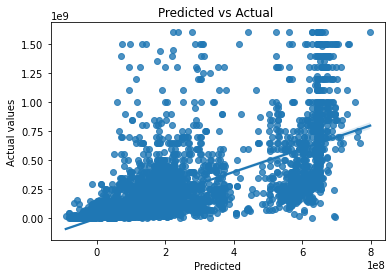

             price     Predicted     Residuals     Diff_in_%
10586  650000000.0  6.499031e+08  9.689853e+04      0.014907
17594  205000000.0  2.050362e+08 -3.615740e+04      0.017638
16127   40000000.0  3.999195e+07  8.054776e+03      0.020137
18098  130000000.0  1.300284e+08 -2.840905e+04      0.021853
4216   175000000.0  1.749564e+08  4.360819e+04      0.024919
...            ...           ...           ...           ...
8131    25000000.0  6.928299e+08 -6.678299e+08   2671.319632
2640     7200000.0  2.416458e+08 -2.344458e+08   3256.191435
7302     6000000.0  3.286816e+08 -3.226816e+08   5378.026472
4839     8700000.0  6.937525e+08 -6.850525e+08   7874.166520
15947    6000000.0  6.264847e+08 -6.204847e+08  10341.412211

[10758 rows x 4 columns]


In [107]:
ridge_regressor= Ridge()
        
parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

ridge_regressor_4=RandomizedSearchCV(ridge_regressor,param_distributions=parameters,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3) 
    


# Fit the model
model,metrics_table_4=regression_model_4(ridge_regressor_4)

In [108]:
metrics_table_4.index=['Ridge_experiment_4']
metrics_table_4

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Ridge_experiment_4,8.614359e+07,2.448039e+16,1.564621e+08,0.507232


# LASSO REGRESSION 4

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train_Mean_absolute_error --- 86145914.41353565
Train_R2_score --- 0.5072318512637788
Train_Mean_squared_error --- 2.4480379633273892e+16
Train_Root_mean_squared_error --- 156462070.9094504
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5068651059674825
Train_Normalised_rmse --- 0.0981568826282625




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

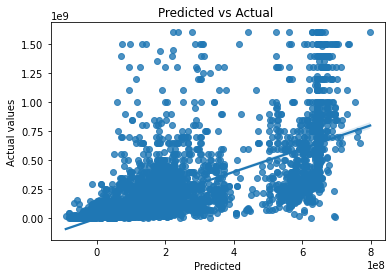

             price     Predicted     Residuals     Diff_in_%
14866  250000000.0  2.499946e+08  5.449605e+03      0.002180
10586  650000000.0  6.499544e+08  4.556477e+04      0.007010
18098  130000000.0  1.300094e+08 -9.409714e+03      0.007238
21176   34999999.0  3.499729e+07  2.711398e+03      0.007747
19971   22000000.0  2.200357e+07 -3.569394e+03      0.016225
...            ...           ...           ...           ...
8131    25000000.0  6.935455e+08 -6.685455e+08   2674.181968
2640     7200000.0  2.416755e+08 -2.344755e+08   3256.604119
7302     6000000.0  3.295840e+08 -3.235840e+08   5393.066301
4839     8700000.0  6.944559e+08 -6.857559e+08   7882.252178
15947    6000000.0  6.262191e+08 -6.202191e+08  10336.984844

[10758 rows x 4 columns]


In [109]:
lasso_regressor= Lasso()
        
parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

lasso_regressor_4=RandomizedSearchCV(lasso_regressor,param_distributions=parameters,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3) 
 
    


# Fit the model
model,metrics_table_4a=regression_model_4(lasso_regressor_4)

In [110]:
metrics_table_4a.index=['Lasso_experiment_4']
metrics_table_4a

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Lasso_experiment_4,8.614591e+07,2.448038e+16,1.564621e+08,0.507232


# ELASTIC NET REGRESSION

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train_Mean_absolute_error --- 86145582.36239846
Train_R2_score --- 0.5072314117938246
Train_Mean_squared_error --- 2.4480401465836212e+16
Train_Root_mean_squared_error --- 156462140.67893937
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5068646661704503
Train_Normalised_rmse --- 0.09815692639833085




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

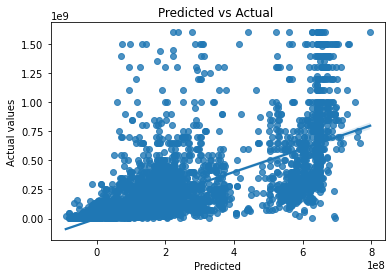

             price     Predicted     Residuals     Diff_in_%
16127   40000000.0  3.999916e+07  8.431528e+02      0.002108
22057   28000000.0  2.800171e+07 -1.713752e+03      0.006121
4216   175000000.0  1.749755e+08  2.447018e+04      0.013983
10586  650000000.0  6.499048e+08  9.519786e+04      0.014646
18098  130000000.0  1.300268e+08 -2.678268e+04      0.020602
...            ...           ...           ...           ...
8131    25000000.0  6.925847e+08 -6.675847e+08   2670.338634
2640     7200000.0  2.416324e+08 -2.344324e+08   3256.004966
7302     6000000.0  3.283889e+08 -3.223889e+08   5373.147579
4839     8700000.0  6.935279e+08 -6.848279e+08   7871.584838
15947    6000000.0  6.265851e+08 -6.205851e+08  10343.084962

[10758 rows x 4 columns]


In [111]:
enet_regressor= ElasticNet()
        
parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]}

enet_regressor_4=RandomizedSearchCV(enet_regressor,param_distributions=parameters,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3) 
 


# Fit the model
model,metrics_table_4b =regression_model_4(enet_regressor_4) 


In [112]:
metrics_table_4b.index=['Elastic_Net_experiment_4']
metrics_table_4b

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Elastic_Net_experiment_4,8.614558e+07,2.448040e+16,1.564621e+08,0.507231


# DECISION TREE REGRESSION

Train_Mean_absolute_error --- 36915988.37821663
Train_R2_score --- 0.8281323039127383
Train_Mean_squared_error --- 8538267860255966.0
Train_Root_mean_squared_error --- 92402748.12069155
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.8280043904725394
Train_Normalised_rmse --- 0.057969101706832844




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

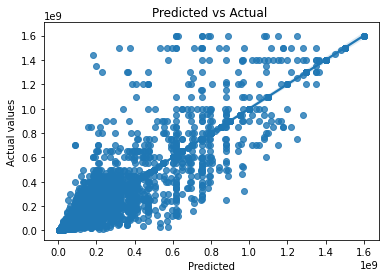

             price     Predicted     Residuals    Diff_in_%
19897  220000000.0  2.200000e+08  0.000000e+00     0.000000
2844    40000000.0  4.000000e+07  0.000000e+00     0.000000
11615   70000000.0  7.000000e+07  0.000000e+00     0.000000
13447   27000000.0  2.700000e+07  0.000000e+00     0.000000
3817    20000000.0  2.000000e+07  0.000000e+00     0.000000
...            ...           ...           ...          ...
9874    16000000.0  2.118750e+08 -1.958750e+08  1224.218750
7361     8500000.0  1.161667e+08 -1.076667e+08  1266.666667
3445    15000000.0  2.337500e+08 -2.187500e+08  1458.333333
12980   27000000.0  5.306667e+08 -5.036667e+08  1865.432099
22940   29000000.0  5.763333e+08 -5.473333e+08  1887.356322

[10758 rows x 4 columns]


In [113]:
tree_4 = DecisionTreeRegressor()
           

# Fit the model
model,metrics_table_4c=regression_model_4(tree_4)

In [114]:
metrics_table_4c.index=['Decision_Tree_experiment_4']
metrics_table_4c

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Decision_Tree_experiment_4,3.691599e+07,8.538268e+15,9.240275e+07,0.828132


# DECISION TREE WITH HYPERPARAMETER TUNING

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train_Mean_absolute_error --- 70384042.12293296
Train_R2_score --- 0.6162706390109135
Train_Mean_squared_error --- 1.9063408334200108e+16
Train_Root_mean_squared_error --- 138070302.14423415
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6159850464080748
Train_Normalised_rmse --- 0.08661875918709797




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

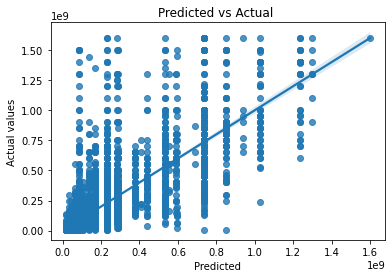

              price     Predicted     Residuals     Diff_in_%
19513  1.300000e+09  1.300000e+09  0.000000e+00      0.000000
6292   8.500000e+08  8.500000e+08  0.000000e+00      0.000000
16817  1.300000e+09  1.300000e+09  0.000000e+00      0.000000
18559  1.300000e+09  1.300000e+09  0.000000e+00      0.000000
15538  2.900000e+08  2.900000e+08  0.000000e+00      0.000000
...             ...           ...           ...           ...
7361   8.500000e+06  2.328815e+08 -2.243815e+08   2639.782376
2640   7.200000e+06  2.316207e+08 -2.244207e+08   3116.953704
7302   6.000000e+06  2.328815e+08 -2.268815e+08   3781.358366
4839   8.700000e+06  8.523827e+08 -8.436827e+08   9697.501916
15947  6.000000e+06  7.334953e+08 -7.274953e+08  12124.922118

[10758 rows x 4 columns]


In [115]:
tree_4i = DecisionTreeRegressor()
parameters = {"max_depth":    [1,2,3,4,5,],
             }
tree_4ii=RandomizedSearchCV(tree_4i,param_distributions=parameters,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3) 
                

# Fit the model
model,metrics_table_4ci=regression_model_4(tree_4ii)

In [116]:
metrics_table_4ci.index=['Decision_Tree_experiment_4_hyperparameter_tuning']
metrics_table_4ci

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Decision_Tree_experiment_4_hyperparameter_tuning,7.038404e+07,1.906341e+16,1.380703e+08,0.616271


# RANDOM FOREST

Train_Mean_absolute_error --- 46673268.40867851
Train_R2_score --- 0.8032816635102473
Train_Mean_squared_error --- 9772830428358566.0
Train_Root_mean_squared_error --- 98857627.06214714
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.8031352548497284
Train_Normalised_rmse --- 0.06201858661364312




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

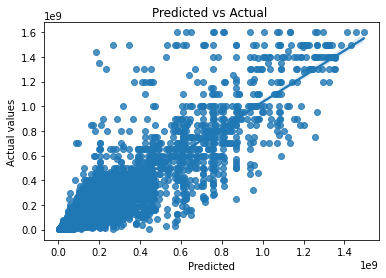

             price     Predicted     Residuals    Diff_in_%
22325  440000000.0  4.399842e+08  1.583333e+04     0.003598
17824   30000000.0  2.999627e+07  3.733333e+03     0.012444
1799   850000000.0  8.498517e+08  1.483333e+05     0.017451
23563  150000000.0  1.499583e+08  4.166667e+04     0.027778
4396   130000000.0  1.299541e+08  4.589286e+04     0.035302
...            ...           ...           ...          ...
3445    15000000.0  2.308568e+08 -2.158568e+08  1439.045317
22940   29000000.0  5.272691e+08 -4.982691e+08  1718.169458
12980   27000000.0  5.733568e+08 -5.463568e+08  2023.543627
15947    6000000.0  2.704334e+08 -2.644334e+08  4407.223545
4839     8700000.0  4.465610e+08 -4.378610e+08  5032.885057

[10758 rows x 4 columns]


In [117]:
forest_4 = RandomForestRegressor()

# Fit the model
model,metrics_table_4e=regression_model_4(forest_4)

In [118]:
metrics_table_4e.index=['Random_forest_experiment_4']
metrics_table_4e

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Random_forest_experiment_4,4.667327e+07,9.772830e+15,9.885763e+07,0.803282


# RANDOM FOREST HYPERPARAMETER TUNING

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train_Mean_absolute_error --- 66223818.66547138
Train_R2_score --- 0.6577129445923959
Train_Mean_squared_error --- 1.7004583355120726e+16
Train_Root_mean_squared_error --- 130401623.28407083
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.6574581956442835
Train_Normalised_rmse --- 0.08180779377921633




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

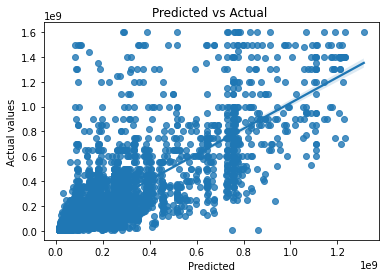

            price     Predicted     Residuals     Diff_in_%
9862   47000000.0  4.699604e+07  3.959004e+03      0.008423
12382  16000000.0  1.599454e+07  5.461528e+03      0.034135
11702  16000000.0  1.599454e+07  5.461528e+03      0.034135
331    16000000.0  1.599454e+07  5.461528e+03      0.034135
2369   18500000.0  1.849145e+07  8.549726e+03      0.046215
...           ...           ...           ...           ...
20088   6500000.0  1.987607e+08 -1.922607e+08   2957.856828
2640    7200000.0  2.811929e+08 -2.739929e+08   3805.456501
7302    6000000.0  2.349403e+08 -2.289403e+08   3815.671810
4839    8700000.0  8.611170e+08 -8.524170e+08   9797.896718
15947   6000000.0  7.499512e+08 -7.439512e+08  12399.187051

[10758 rows x 4 columns]


In [119]:
forest_4i = RandomForestRegressor()

parameters = {"n_estimators": [50,80,100,150,200,300,500],
              'max_depth': [1,2,4,5,6,7,8,9,10,12],
              'max_features':['auto','sqrt','log2'],}
forest_4ii=RandomizedSearchCV(forest_4i,param_distributions=parameters,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3) 


# Fit the model
model,metrics_table_4ei=regression_model_4(forest_4ii)

In [120]:
metrics_table_4ei.index=['Random_forest_experiment_4_hyperparamter_tuning']
metrics_table_4ei

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Random_forest_experiment_4_hyperparamter_tuning,6.622382e+07,1.700458e+16,1.304016e+08,0.657713


# ADABOOST

Train_Mean_absolute_error --- 99369561.29949228
Train_R2_score --- 0.45687416675918624
Train_Mean_squared_error --- 2.69821144497118e+16
Train_Root_mean_squared_error --- 164262334.23920348
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.4564699424903308
Train_Normalised_rmse --- 0.10305039789159566




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

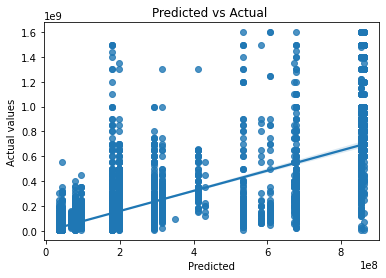

             price     Predicted     Residuals     Diff_in_%
4969   197000000.0  1.969300e+08  7.001524e+04      0.035541
2145   197000000.0  1.969300e+08  7.001524e+04      0.035541
216     80000000.0  7.984309e+07  1.569071e+05      0.196134
8308    80000000.0  7.984309e+07  1.569071e+05      0.196134
1678    80000000.0  7.984309e+07  1.569071e+05      0.196134
...            ...           ...           ...           ...
20663   22000000.0  8.553241e+08 -8.333241e+08   3787.836633
7302     6000000.0  2.916032e+08 -2.856032e+08   4760.054093
2640     7200000.0  5.335819e+08 -5.263819e+08   7310.859552
4839     8700000.0  8.618753e+08 -8.531753e+08   9806.612969
15947    6000000.0  8.553241e+08 -8.493241e+08  14155.400989

[10758 rows x 4 columns]


In [121]:
adaboost_4=AdaBoostRegressor()


model,metrics_table_4f = regression_model_4(adaboost_4)


In [122]:
metrics_table_4f.index=['Adaboost_experiment_4']
metrics_table_4f

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Adaboost_experiment_4,9.936956e+07,2.698211e+16,1.642623e+08,0.456874


In [123]:
# ADABOOST HYPERPARAMETER TUNING

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train_Mean_absolute_error --- 84808883.14525245
Train_R2_score --- 0.5512992027040045
Train_Mean_squared_error --- 2.229114419779306e+16
Train_Root_mean_squared_error --- 149302190.8673582
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.5509652547666737
Train_Normalised_rmse --- 0.0936651134676024




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

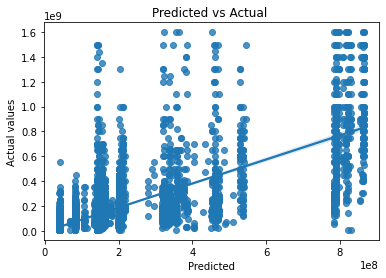

             price     Predicted     Residuals     Diff_in_%
20946   39500000.0  3.947554e+07  2.445965e+04      0.061923
13579   39500000.0  3.947554e+07  2.445965e+04      0.061923
9271   155000000.0  1.552677e+08 -2.677315e+05      0.172730
11012  155000000.0  1.552677e+08 -2.677315e+05      0.172730
77     155000000.0  1.552677e+08 -2.677315e+05      0.172730
...            ...           ...           ...           ...
6584     6000000.0  1.423423e+08 -1.363423e+08   2272.372463
7302     6000000.0  2.052279e+08 -1.992279e+08   3320.464226
2640     7200000.0  3.540949e+08 -3.468949e+08   4817.985232
4839     8700000.0  8.303123e+08 -8.216123e+08   9443.819558
15947    6000000.0  8.203849e+08 -8.143849e+08  13573.081040

[10758 rows x 4 columns]


In [124]:
adaboost_=AdaBoostRegressor()


parameters = {"n_estimators": [80,100,150,200,500],
              "learning_rate": [0.0001,0.001,0.01, 0.015]}


adaboost_4i=RandomizedSearchCV(adaboost_,param_distributions=parameters,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3) 

model,metrics_table_4fi = regression_model_4(adaboost_4i)


In [125]:
metrics_table_4fi.index=['Adaboost_experiment_4_hyperparameter_tuning']
metrics_table_4fi

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
Adaboost_experiment_4_hyperparameter_tuning,8.480888e+07,2.229114e+16,1.493022e+08,0.551299


# XGBOOST

Train_Mean_absolute_error --- 52035769.4000366
Train_R2_score --- 0.7765529041074392
Train_Mean_squared_error --- 1.110069664492575e+16
Train_Root_mean_squared_error --- 105359843.60716255
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.7763866024266186
Train_Normalised_rmse --- 0.06609776888780587




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

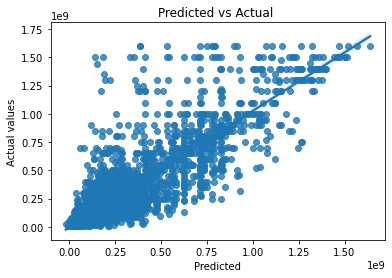

              price     Predicted    Residuals    Diff_in_%
309    1.900000e+08  1.899864e+08      13552.0     0.007133
9452   2.500000e+07  2.499763e+07       2372.0     0.009488
13283  1.050000e+07  1.050101e+07      -1010.0     0.009619
3690   1.400000e+09  1.400282e+09    -281600.0     0.020114
7492   1.000000e+08  9.997613e+07      23872.0     0.023872
...             ...           ...          ...          ...
8374   7.000000e+06  1.122507e+08 -105250688.0  1503.581257
3445   1.500000e+07  2.456819e+08 -230681904.0  1537.879360
2640   7.200000e+06  1.690006e+08 -161800560.0  2247.230000
7361   8.500000e+06  2.098969e+08 -201396912.0  2369.375435
15947  6.000000e+06  2.163883e+08 -210388256.0  3506.470933

[10758 rows x 4 columns]


In [127]:
xgb_ = xgb.XGBRegressor()
                

# Fit the model
model,metrics_table_4d=regression_model_4(xgb_)

In [128]:
metrics_table_4d.index=['XGBoost_experiment_4']
metrics_table_4d

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
XGBoost_experiment_4,5.203577e+07,1.110070e+16,1.053598e+08,0.776553


# XGBOOST HYPERPARAMETER TUNING

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[16:00:21] WARNING: D:\bld\xgboost-split_1660208973102\work\src\learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Train_Mean_absolute_error --- 61294300.66812561
Train_R2_score --- 0.7006493689471971
Train_Mean_squared_error --- 1.4871531592346316e+16
Train_Root_mean_squared_error --- 121948889.2624542
Standard deviation of dependent variable --- 1.0
Train_Adjusted_r2 --- 0.7004265756595962
Train_Normalised_rmse --- 0.07650494934909297




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

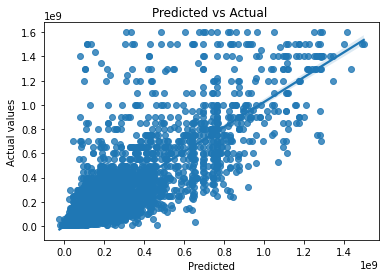

             price    Predicted    Residuals    Diff_in_%
15784  170000000.0  170012752.0     -12752.0     0.007501
15154   95000000.0   95008784.0      -8784.0     0.009246
24112  100000000.0   99987368.0      12632.0     0.012632
13608   32000000.0   32004164.0      -4164.0     0.013012
21260  175000000.0  174968224.0      31776.0     0.018158
...            ...          ...          ...          ...
7361     8500000.0  254138160.0 -245638160.0  2889.860706
20088    6500000.0  215351920.0 -208851920.0  3213.106462
2640     7200000.0  286595648.0 -279395648.0  3880.495111
4839     8700000.0  465361920.0 -456661920.0  5248.987586
15947    6000000.0  337823424.0 -331823424.0  5530.390400

[10758 rows x 4 columns]


In [129]:
xgb_ = xgb.XGBRegressor()
                
parameters = {"n_estimators": [80,100,150,200,500],
              'max_depth': [4,5,6,7,8],
              'max_features':['auto','sqrt','log2'],}
xgb_4i=RandomizedSearchCV(xgb_,param_distributions=parameters,n_iter=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=3) 

# Fit the model
model,metrics_table_4di=regression_model_4(xgb_4i)

In [130]:
metrics_table_4di.index=['XGBoost_experiment_4_hyperparameter_tuning']
metrics_table_4di

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
XGBoost_experiment_4_hyperparameter_tuning,6.129430e+07,1.487153e+16,1.219489e+08,0.700649


## RESULTS

In [131]:
metrics_table=pd.concat([metrics_table_1,metrics_table_1b,metrics_table_1c,metrics_table_1d,metrics_table_1e,metrics_table_1f,metrics_table_2,metrics_table_2a,metrics_table_2b,metrics_table_2c,metrics_table_2e,metrics_table_2d,metrics_table_2f,metrics_table_3c,metrics_table_3,metrics_table_3b,metrics_table_3e,metrics_table_3d,metrics_table_3f,metrics_table_4,metrics_table_4a,metrics_table_4b,metrics_table_4c,metrics_table_4e,metrics_table_4f,metrics_table_4d,metrics_table_4di,metrics_table_4fi,metrics_table_4ei,metrics_table_4ci],axis=0)

In [132]:
metrics_table

,Mean_absolute_error,Mean_squared_error,Root_mean_squared_error,R2_score
ridge_experiment_1,8.691422e+07,9.006820e+16,3.001136e+08,0.298515
Elastic_net_experiment_1,1.332575e+08,1.374967e+17,3.708055e+08,-0.070876
Decision_tree_experiment_1,1.027099e+08,1.013519e+17,3.183582e+08,0.210633
XGBoost_Regression_experiment_1,1.329072e+08,1.227524e+17,3.503604e+08,0.043957
Random_forest_experiment_1,1.198953e+08,1.298500e+17,3.603471e+08,-0.011321
Adaboost_experiment_1,1.168251e+08,1.249180e+17,3.534374e+08,0.027091
Ridge_experiment_2,8.288269e+07,2.382959e+16,1.543684e+08,0.520332
Lasso_experiment_2,8.293472e+07,2.382453e+16,1.543520e+08,0.520434
Elastic_Net_experiment_2,8.286679e+07,2.383899e+16,1.543988e+08,0.520142
Decision_Tree_experiment_2,7.897558e+07,2.088033e+16,1.445003e+08,0.579698


<AxesSubplot:>

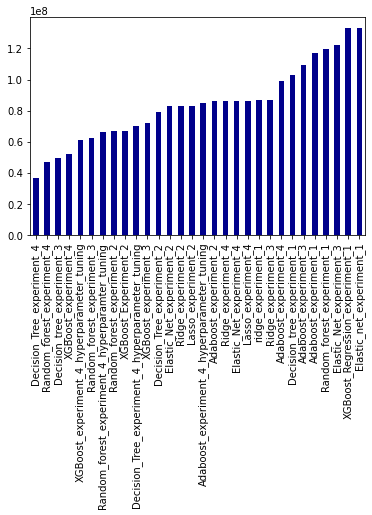

In [133]:
metrics_table['Mean_absolute_error'].sort_values(ascending=True).plot.bar(color='darkblue')

<AxesSubplot:>

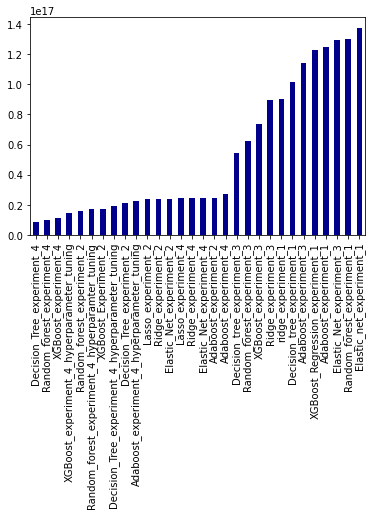

In [134]:
metrics_table['Mean_squared_error'].sort_values(ascending=True).plot.bar(color='darkblue')

<AxesSubplot:>

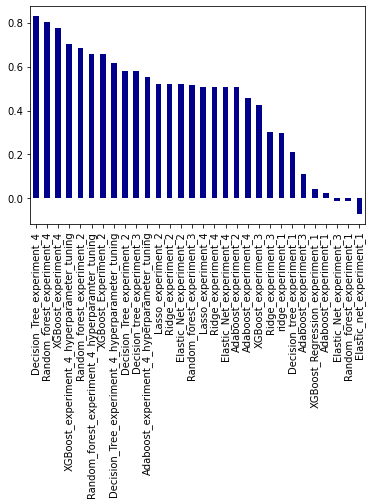

In [135]:
metrics_table['R2_score'].sort_values(ascending=False).plot.bar(color='darkblue')

# MODEL TESTING
**MODEL SELECTED FOR TEST: **

In [136]:
from sklearn.base import BaseEstimator, TransformerMixin

# Add a step to create new columns in the pipeline
class FeatureUp(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['total_rooms'] = X_copy['bedrooms'] + X_copy['bathrooms'] + X_copy['toilets']
        return X_copy

In [137]:
test_copy_4=test.copy()

ytest_4=test_copy_4['price']
xtest_4=test_copy_4.drop(['price'],axis=1)

In [138]:
test_pipeline=Pipeline([('create_new_columns',FeatureUp()),
                        ('target_encoding',TargetEncoder())])
xtest_4_transformed=test_pipeline.fit_transform(xtest_4,ytest_4)

In [148]:
test_pred_forest=forest_4.predict(xtest_4_transformed)

Train_Mean_absolute_error --- 89221374.48311682
Train_R2_score --- 0.45088000556690144
Train_Mean_squared_error --- 4.464264646074797e+16
Train_Root_mean_squared_error --- 211288065.1166742
Standard deviation of dependent variable --- 285128964.8139014
Train_Adjusted_r2 --- 0.4495568248574241
Train_Normalised_rmse --- 0.05282729900906946




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

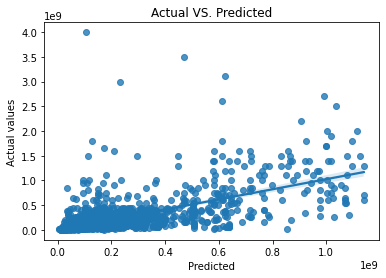

             price     Predicted     Residuals     Diff_in_%
2409    40000000.0  3.999605e+07  3.954781e+03      0.009887
10850  160000000.0  1.599567e+08  4.333334e+04      0.027083
5902   165000000.0  1.648502e+08  1.498467e+05      0.090816
10482   36000000.0  3.605383e+07 -5.383333e+04      0.149537
1917    17000000.0  1.702751e+07 -2.751190e+04      0.161835
...            ...           ...           ...           ...
17265    3000000.0  7.666083e+07 -7.366083e+07   2455.361111
8938     1500000.0  4.076012e+07 -3.926012e+07   2617.341270
410      6000000.0  5.816740e+08 -5.756740e+08   9594.566744
8623     6000000.0  8.527789e+08 -8.467789e+08  14112.982143
7083      400000.0  1.721159e+08 -1.717159e+08  42928.982700

[2913 rows x 4 columns]


In [149]:
r2score=r2_score(ytest_4,test_pred_forest)

mae=mean_absolute_error(test_pred_forest,ytest_4)

mse=mean_squared_error(ytest_4,test_pred_forest)

root_mean_squared_error=np.sqrt(mse)

#to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
# A RMSE value lower than the standard deviation indicates good model performance

std=np.std(ytest_4)

normalised_rmse=root_mean_squared_error/(ytest_4.max()- ytest_4.min())


n=xtest_4.shape[0]
p=xtest_4.shape[1]
adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)





print('Train_Mean_absolute_error','---',mae)
print('Train_R2_score','---',r2score)
print('Train_Mean_squared_error','---',mse)
print('Train_Root_mean_squared_error','---',root_mean_squared_error)
print('Standard deviation of dependent variable','---',std)

print('Train_Adjusted_r2','---',adjusted_r2)
print('Train_Normalised_rmse','---',normalised_rmse)
print()
print()


sns.regplot(x=test_pred_forest,y=ytest_4)
plt.title('Actual VS. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.show();

stats=pd.DataFrame(ytest_4)

stats['Predicted']=test_pred_forest

stats.rename(columns={0:'Actual'},inplace=True)

stats['Residuals']=stats.iloc[:,0] - stats['Predicted']

stats['Diff_in_%']=abs((stats['Residuals']/stats.iloc[:,0])*100)



#to view all data
pd.options.display.max_rows=1000
stats = stats.sort_values(by='Diff_in_%')
print(stats)




In [150]:
test_pred_tree=tree_4.predict(xtest_4_transformed)

Train_Mean_absolute_error --- 110529392.22967058
Train_R2_score --- 0.16923458445607975
Train_Mean_squared_error --- 6.75400042138916e+16
Train_Root_mean_squared_error --- 259884597.87738788
Standard deviation of dependent variable --- 285128964.8139014
Train_Adjusted_r2 --- 0.1672327400812752
Train_Normalised_rmse --- 0.06497764723407037




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

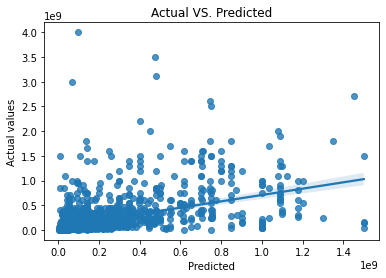

             price     Predicted     Residuals     Diff_in_%
10184  250000000.0  2.500000e+08  0.000000e+00      0.000000
18230   25000000.0  2.500000e+07  0.000000e+00      0.000000
5329    11000000.0  1.100000e+07  0.000000e+00      0.000000
4150   150000000.0  1.500000e+08  0.000000e+00      0.000000
9625    70000000.0  7.000000e+07  0.000000e+00      0.000000
...            ...           ...           ...           ...
20762   33000000.0  1.000000e+09 -9.670000e+08   2930.303030
5482    35000000.0  1.500000e+09 -1.465000e+09   4185.714286
410      6000000.0  6.163462e+08 -6.103462e+08  10172.435897
8623     6000000.0  7.500000e+08 -7.440000e+08  12400.000000
7083      400000.0  1.400000e+08 -1.396000e+08  34900.000000

[2913 rows x 4 columns]


In [151]:
r2score=r2_score(ytest_4,test_pred_tree)

mae=mean_absolute_error(test_pred_tree,ytest_4)

mse=mean_squared_error(ytest_4,test_pred_tree)

root_mean_squared_error=np.sqrt(mse)

#to evaluate whether the RMSE is high or low, we can compare it with the standard deviation of the dependent variable. 
# A RMSE value lower than the standard deviation indicates good model performance

std=np.std(ytest_4)

normalised_rmse=root_mean_squared_error/(ytest_4.max()- ytest_4.min())


n=xtest_4.shape[0]
p=xtest_4.shape[1]
adjusted_r2 = 1 - (1-r2score) *(n-1)/(n-p-1)





print('Train_Mean_absolute_error','---',mae)
print('Train_R2_score','---',r2score)
print('Train_Mean_squared_error','---',mse)
print('Train_Root_mean_squared_error','---',root_mean_squared_error)
print('Standard deviation of dependent variable','---',std)

print('Train_Adjusted_r2','---',adjusted_r2)
print('Train_Normalised_rmse','---',normalised_rmse)
print()
print()


sns.regplot(x=test_pred_tree,y=ytest_4)
plt.title('Actual VS. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual values')
plt.show();

stats=pd.DataFrame(ytest_4)

stats['Predicted']=test_pred_tree

stats.rename(columns={0:'Actual'},inplace=True)

stats['Residuals']=stats.iloc[:,0] - stats['Predicted']

stats['Diff_in_%']=abs((stats['Residuals']/stats.iloc[:,0])*100)



#to view all data
pd.options.display.max_rows=1000
stats = stats.sort_values(by='Diff_in_%')
print(stats)




# SAVING MODEL

In [ ]:
import pickle

In [ ]:
filename='HOUSE_PRICE_PREDICTION_NIGERIA.sav'
pickle.dump(forest_4,open(filename,'wb'))

In [ ]:
#loading the saved model
#model=pickle.load(open('HOUSE_PRICE_PREDICTION_NIGERIA_1.sav','rb'))